# Zillow prize data analysis report

In [1]:
from datetime import datetime
d = datetime.now().date()
t = datetime.now().strftime('%H:%M:%S')
print("This report was last updated on", d, "at", t)

This report was last updated on 2017-10-11 at 12:04:56


## Introduction

The [Zillow Prize](https://www.zillow.com/promo/Zillow-prize/) is a [Kaggle competition](https://www.kaggle.com/c/zillow-prize-1) that aims to inspire data scientists around the world to improve the accuracy of the Zillow "Zestimate" statistical and machine learning models. 

My goal is to compete for the Zillow prize and write up my results.

## Methods

### Data

The data were obtained from [Kaggle website](https://www.kaggle.com/c/zillow-prize-1/data) and consist of the following files:
- `properties_2016.csv.zip`
- `properties_2017.csv.zip`
- `sample_submission.csv`
- `train_2016_v2.csv.zip`
- `train_2017.csv.zip`
- `zillow_data_dictionary.xlsx` 
The `zillow_data_dictionary.xlsx` is a code book that explains the data.
This data will be made available on [figshare](https://figshare.com/) to provide an additional source if the [Kaggle site data](https://www.kaggle.com/c/zillow-prize-1/data) become unavailable.

### Analysis

Data analysis was done in Jupyter Notebook (Pérez and Granger 2007)<cite data-cite="5251998/SH25XT8L"></cite> Integrated Development Environment using the Python language (Pérez, Granger, and Hunter 2011)<cite data-cite="5251998/FGTD82L2"></cite> and a number of software packages:

- NumPy (van der Walt, Colbert, and Varoquaux 2011)<cite data-cite="5251998/3SWILWGR"></cite>

- pandas (McKinney 2010)<cite data-cite="5251998/K3NZPGU9"></cite>

- scikit-learn (Pedregosa et al. 2011)<cite data-cite="5251998/SBYLEUVD"></cite>


### Visualization

The following packages were used to visualize the data:

- Matplotlib (Hunter 2007)<cite data-cite="5251998/WP5LZ6AZ"></cite>

- Seaborn (Waskom et al. 2014)<cite data-cite="5251998/NSFX6VMN"></cite>

### Reproducibility

Reproducibility is extremely important in scientific research yet many examples of problematic studies exist in the literature (Couzin-Frankel 2010)<cite data-cite="5251998/UXR4ZTUS"></cite>.

The names and versions of each package used herein are listed in the accompanying `env.yml` file in the `config` folder.
The computational environment used to analyze the data can be recreated using this `env.yml` file and the [`conda` package and environment manager](https://conda.io/docs/using/envs.html) available as part of the [Anaconda distribution of Python](https://www.anaconda.com/download/).

Additionally, details on how to setup a Docker image capable of running the analysis is included in the `README.md` file in the `config` folder.

The code in the form of a jupyter notebook (`01_zillow_MWS.ipynb`) or Python script (`01_zillow_MWS.py`), can also be run on the Kaggle website (this requires logging in with a username and password).

More information on the details of how this project was created and the computational environment was configured can be found in the accompanying `README.md` file.

This Python 3 environment comes with many helpful analytics libraries installed
It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python (a modified version of this docker image will be made available as part of my project to ensure reproducibility).
For example, here's several helpful packages to load in 

## Results

### Import Libraries and Data

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
### Seaborn style
sns.set_style("whitegrid")

Input data files are available in the "../input/" directory.

Any results I write to the current directory are saved as output.

In [3]:
## Dictionary of feature dtypes
ints = ['parcelid']

floats = ['basementsqft', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 'finishedfloor1squarefeet', 
          'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'finishedsquarefeet13',
          'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6', 'fireplacecnt',
          'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'latitude', 'longitude',
          'lotsizesquarefeet', 'poolcnt', 'poolsizesum', 'roomcnt', 'threequarterbathnbr', 'unitcnt',
          'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt', 'numberofstories',
          'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
          'landtaxvaluedollarcnt', 'taxamount', 'taxdelinquencyyear']

objects = ['airconditioningtypeid', 'architecturalstyletypeid', 'buildingclasstypeid',
           'buildingqualitytypeid', 'decktypeid', 'fips', 'hashottuborspa', 'heatingorsystemtypeid',
           'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'propertycountylandusecode',
           'propertylandusetypeid', 'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
           'regionidcounty', 'regionidneighborhood', 'regionidzip', 'storytypeid',
           'typeconstructiontypeid', 'fireplaceflag', 'taxdelinquencyflag', 'censustractandblock']

feature_dtypes = {col: col_type for type_list, col_type in zip([ints, floats, objects],
                                                               ['int64', 'float64', 'object']) 
                                  for col in type_list}

In [4]:
### Let's import our data
data = pd.read_csv('./input/properties_2016.csv' , dtype = feature_dtypes)


In [5]:
continuous = ['basementsqft', 'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet', 
              'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
              'finishedsquarefeet50', 'finishedsquarefeet6', 'garagetotalsqft', 'latitude',
              'longitude', 'lotsizesquarefeet', 'poolsizesum',  'yardbuildingsqft17',
              'yardbuildingsqft26', 'yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
              'landtaxvaluedollarcnt', 'taxamount']

discrete = ['bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 'fireplacecnt', 'fullbathcnt',
            'garagecarcnt', 'poolcnt', 'roomcnt', 'threequarterbathnbr', 'unitcnt',
            'numberofstories', 'assessmentyear', 'taxdelinquencyyear']

### Exploratory Data Analysis

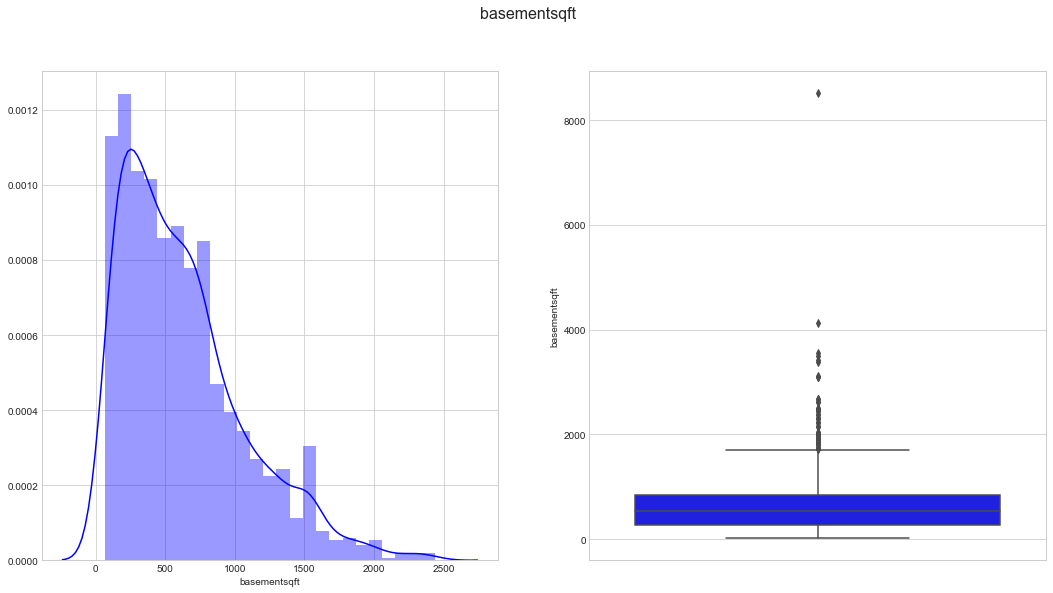

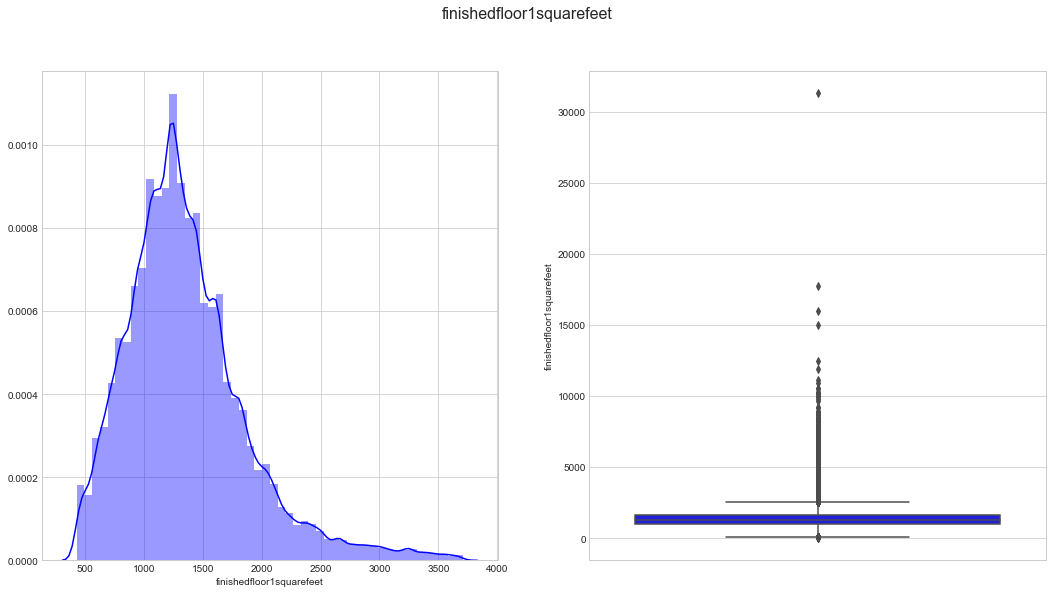

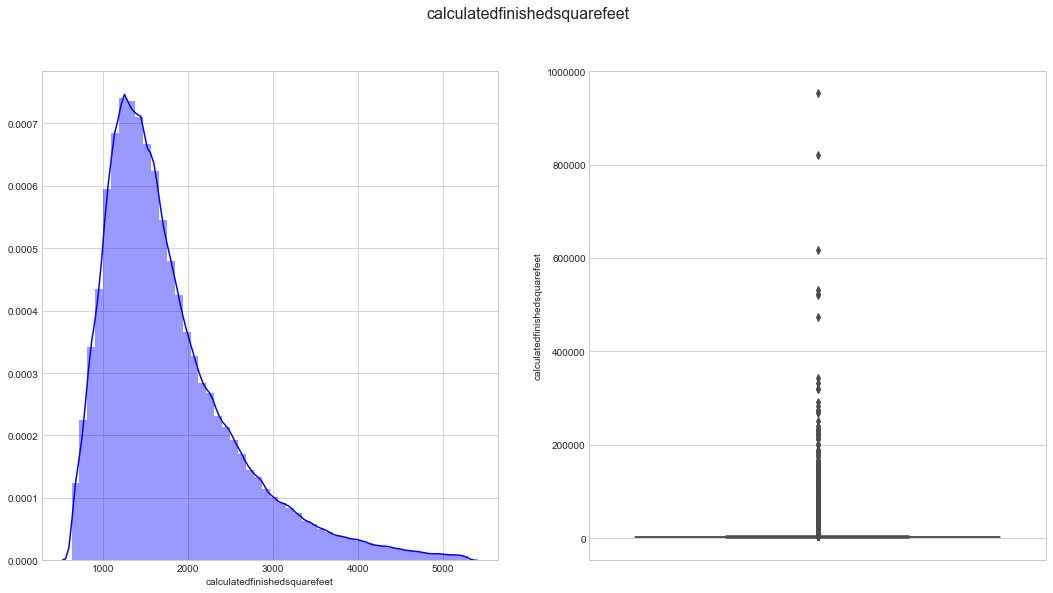

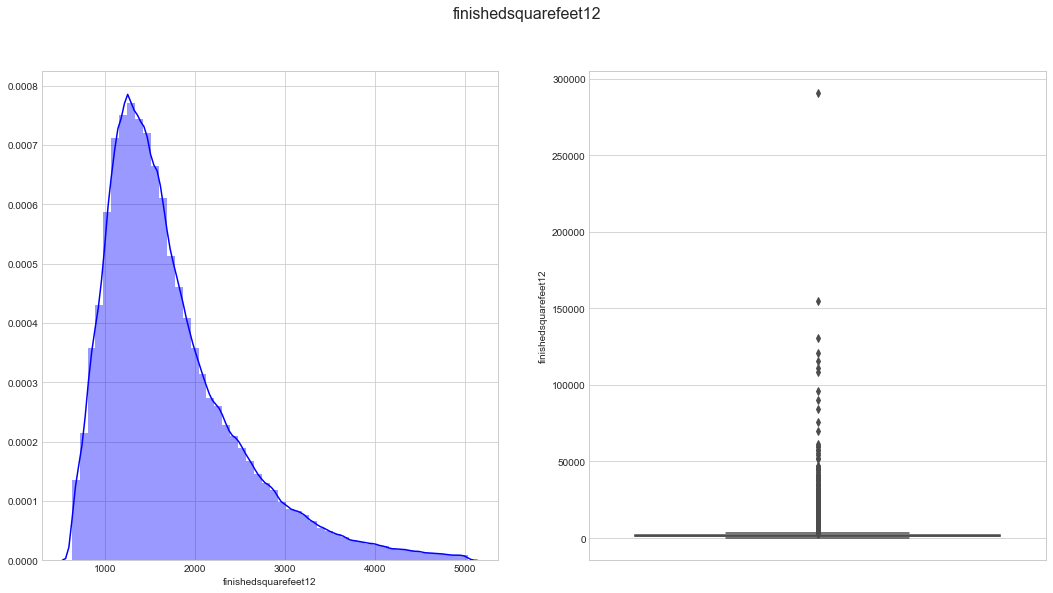

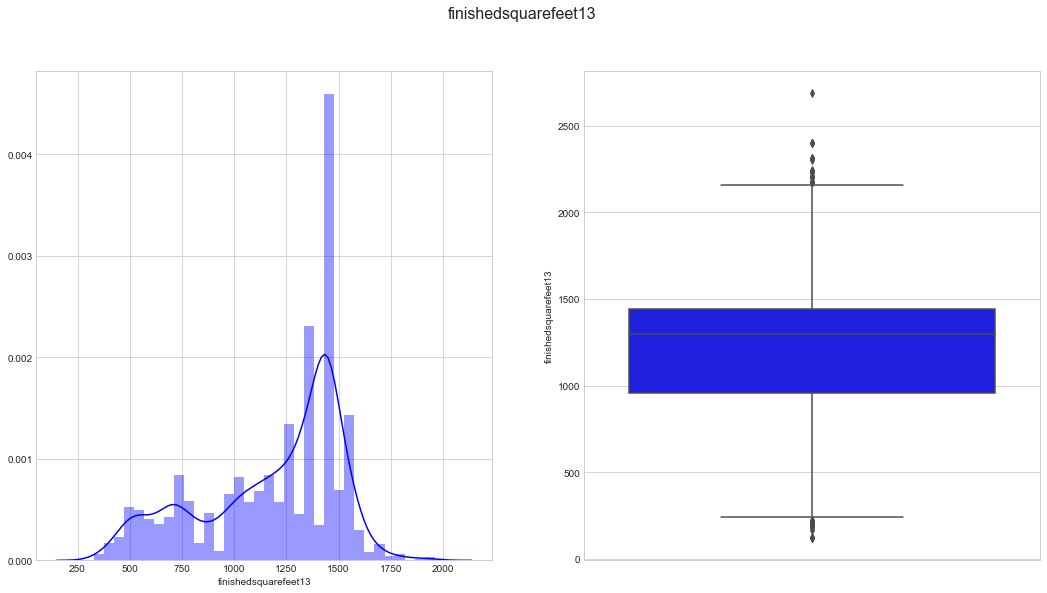

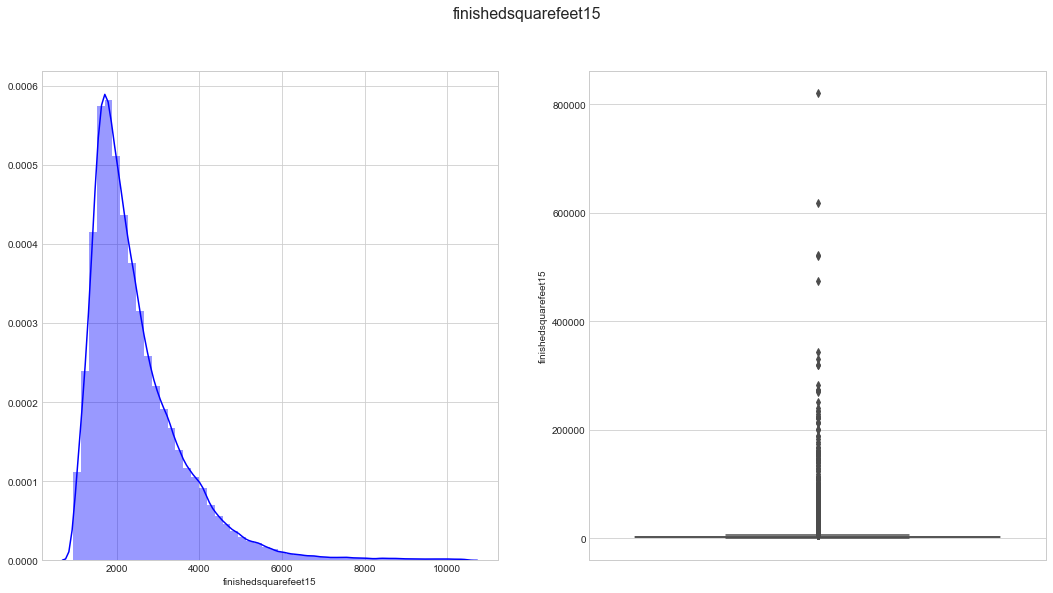

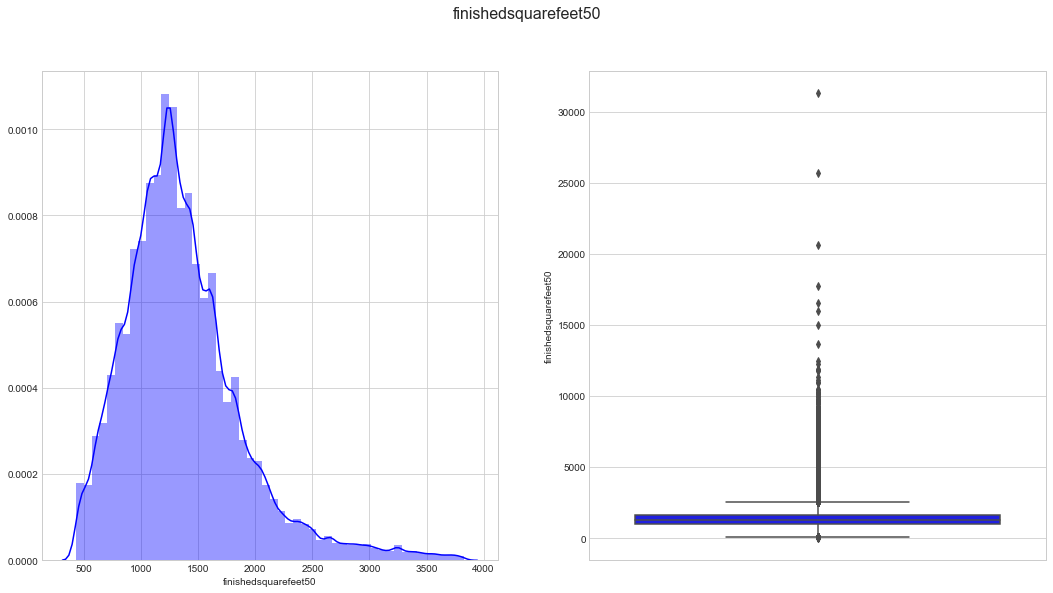

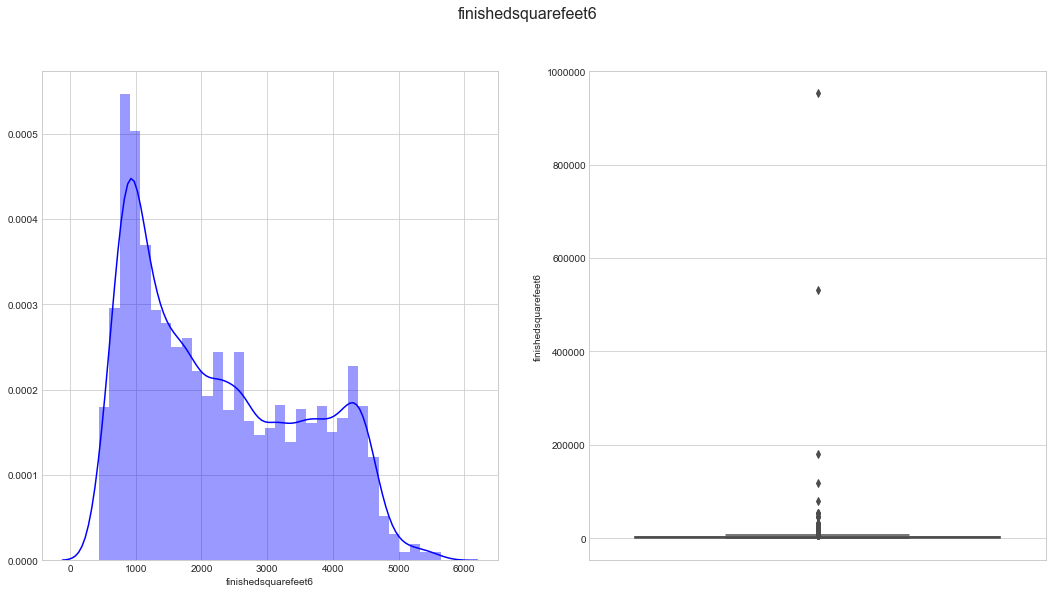

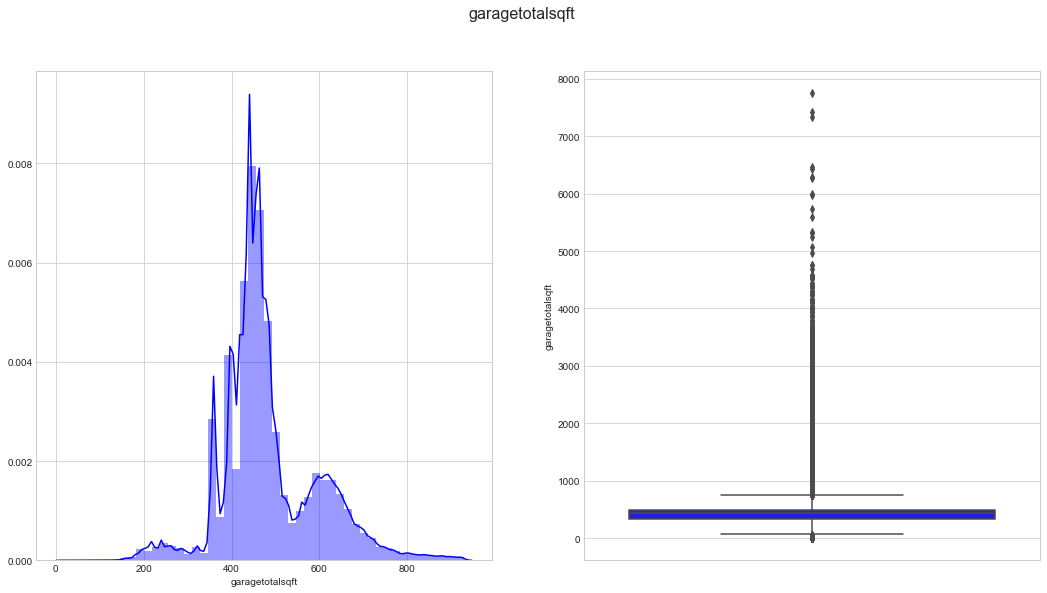

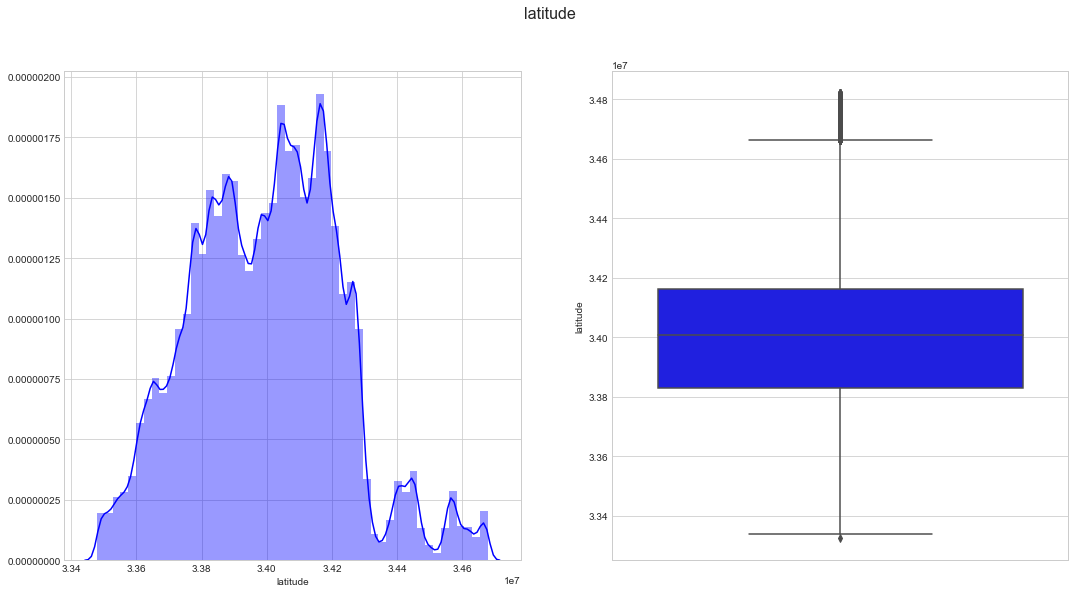

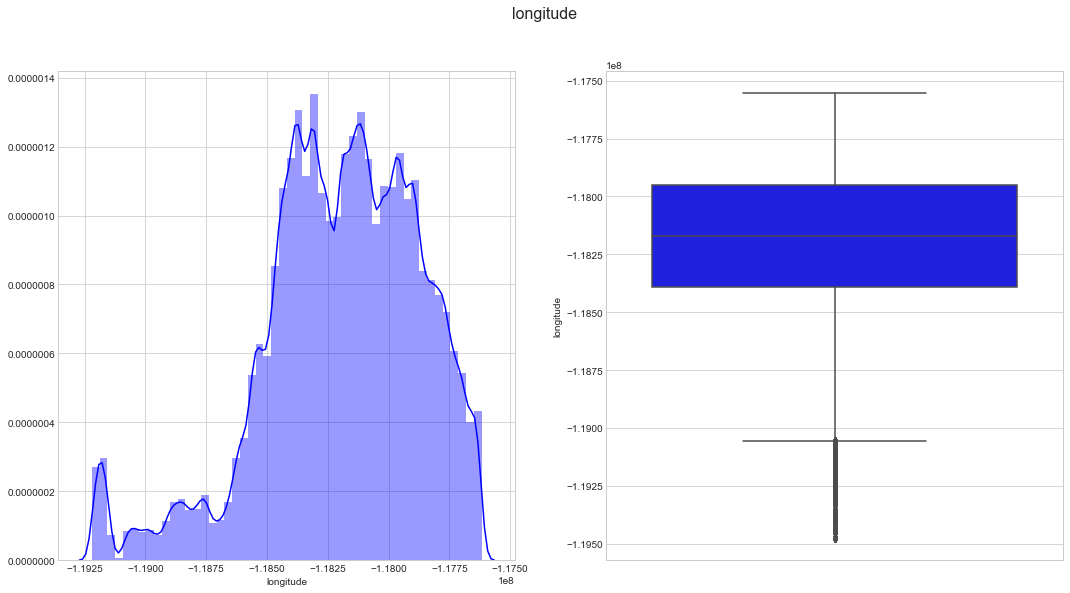

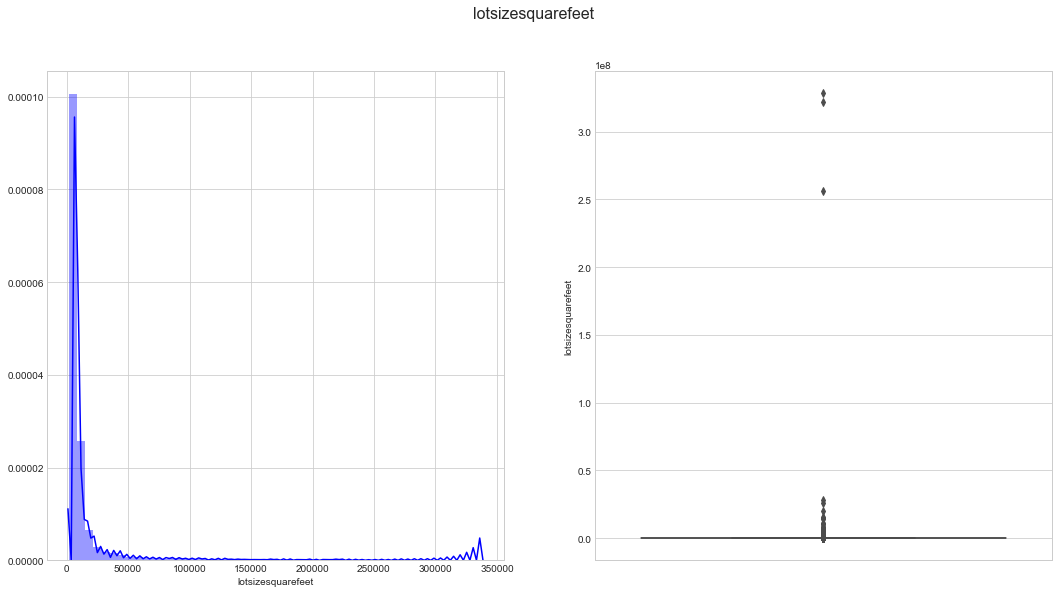

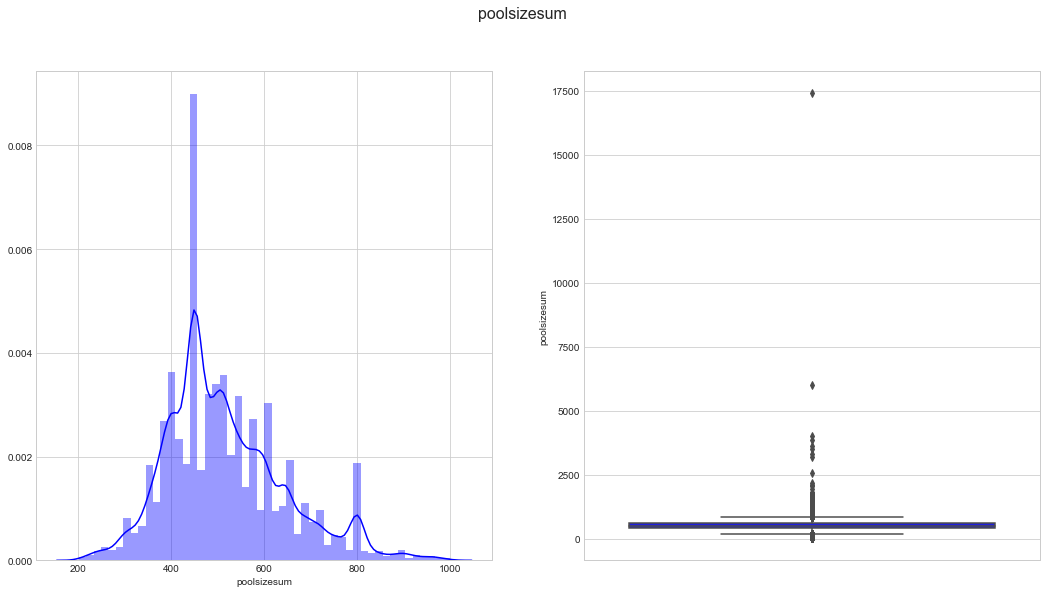

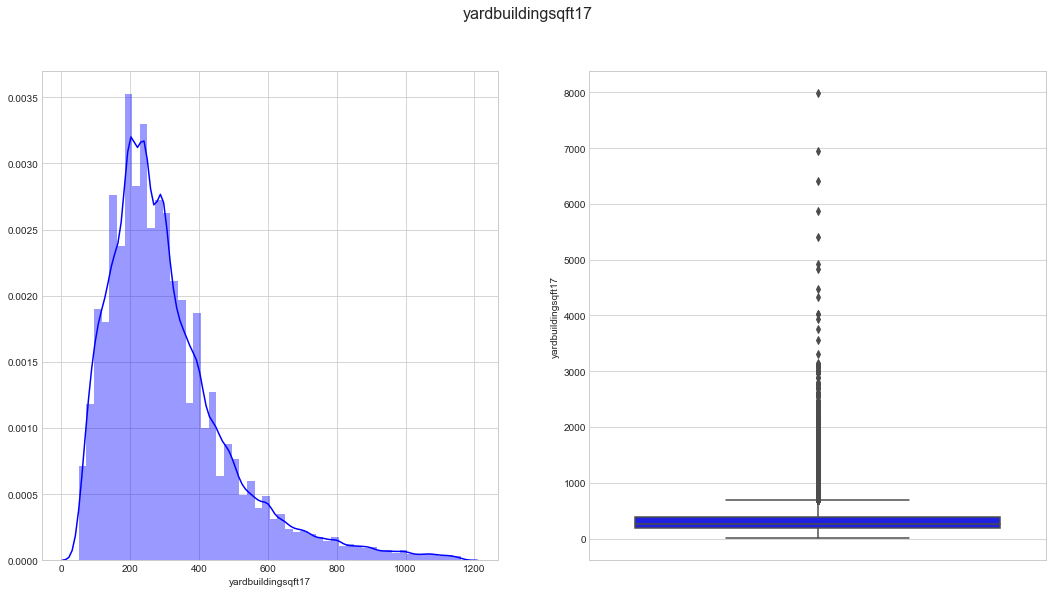

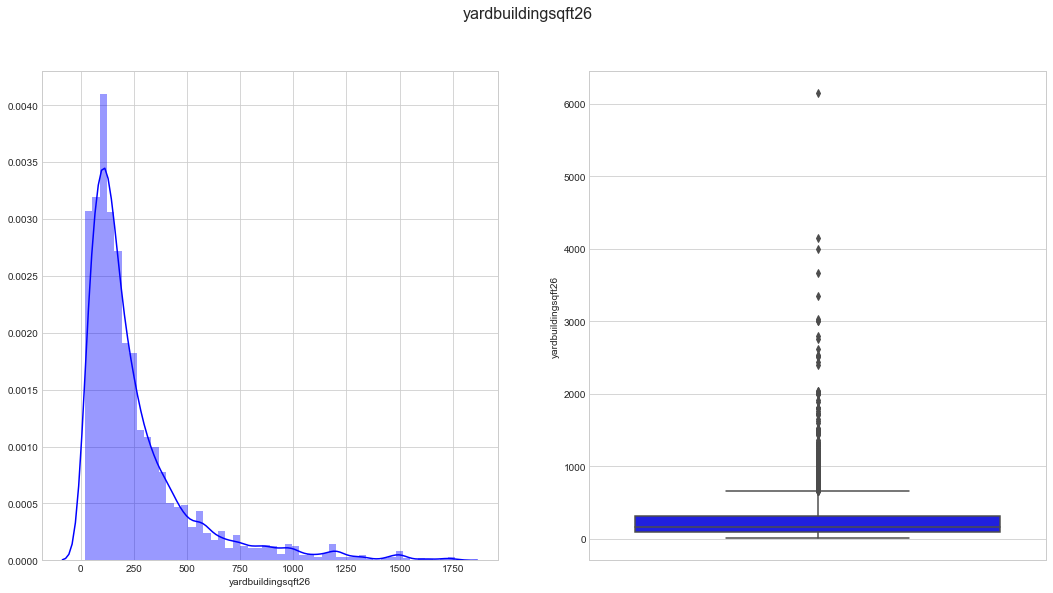

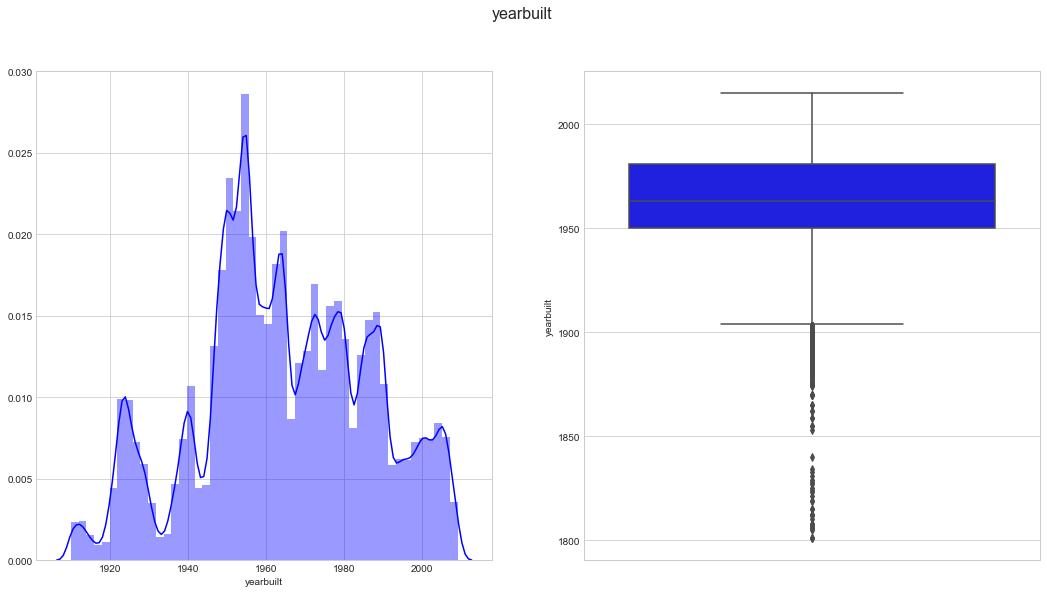

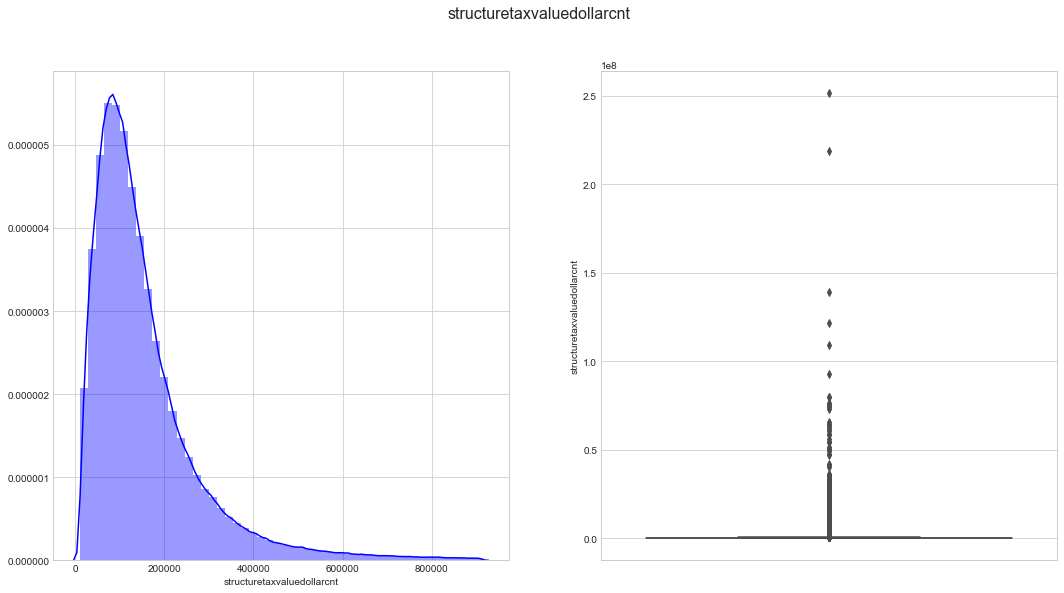

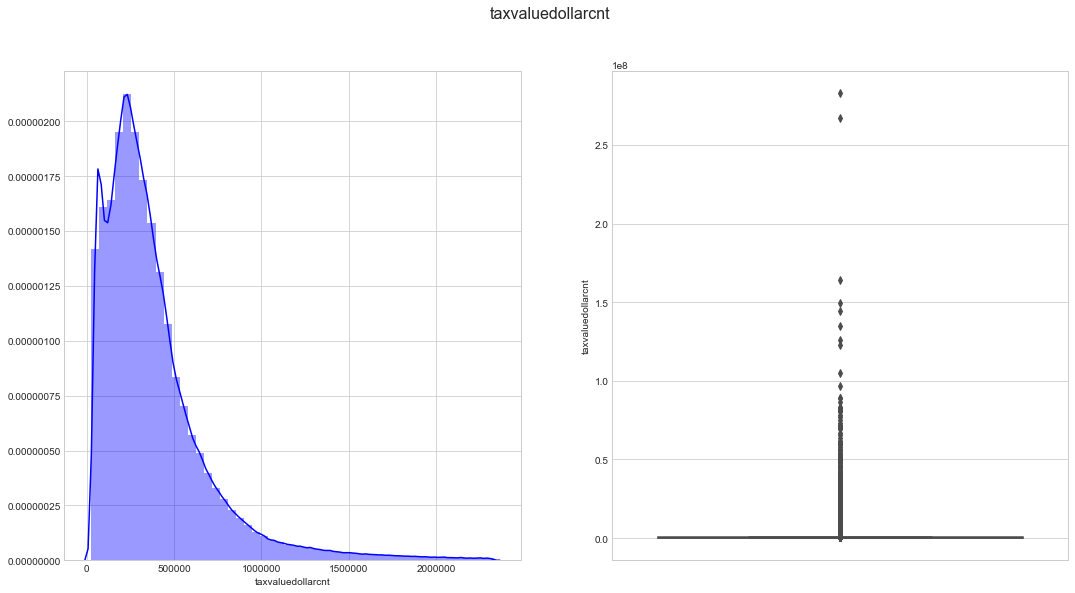

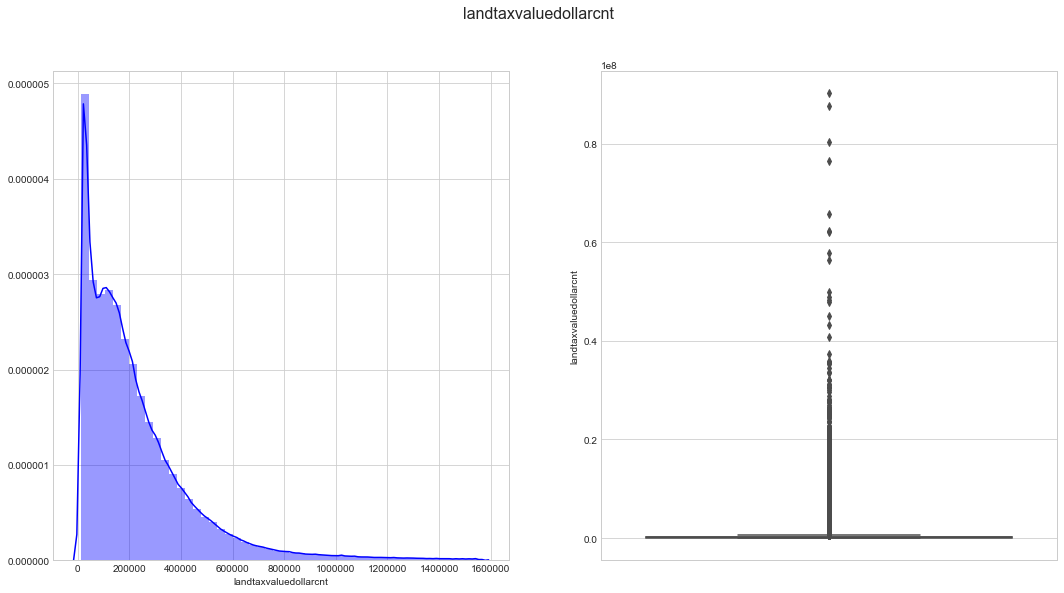

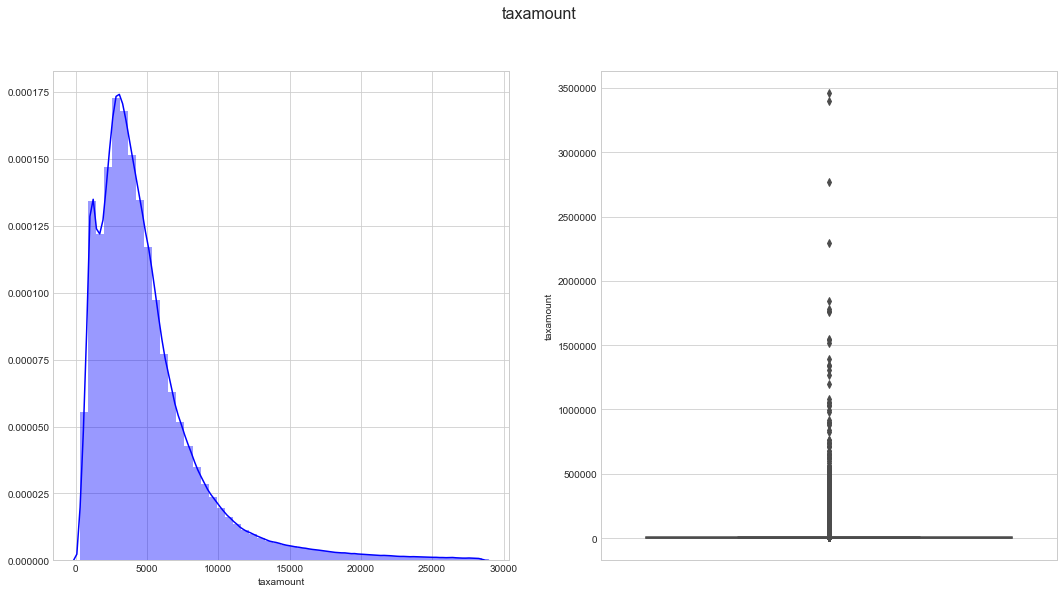

In [6]:
### Continuous variable plots
for col in continuous:
    values = data[col].dropna()
    lower = np.percentile(values, 1)
    upper = np.percentile(values, 99)
    fig = plt.figure(figsize=(18,9));
    sns.distplot(values[(values>lower) & (values<upper)], color='Blue', ax = plt.subplot(121));
    sns.boxplot(y=values, color='Blue', ax = plt.subplot(122));
    plt.suptitle(col, fontsize=16)       

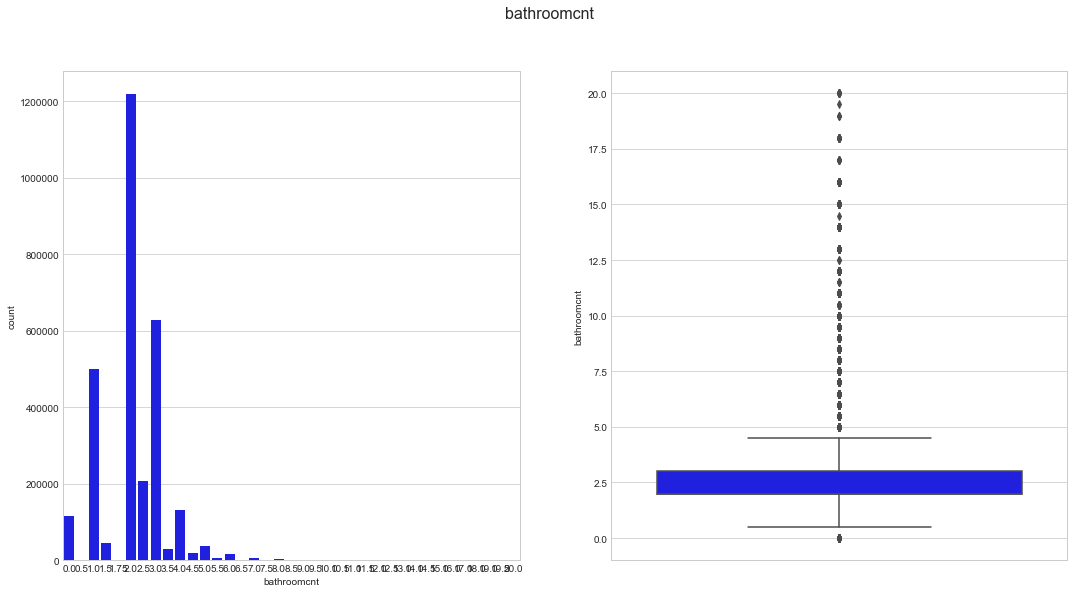

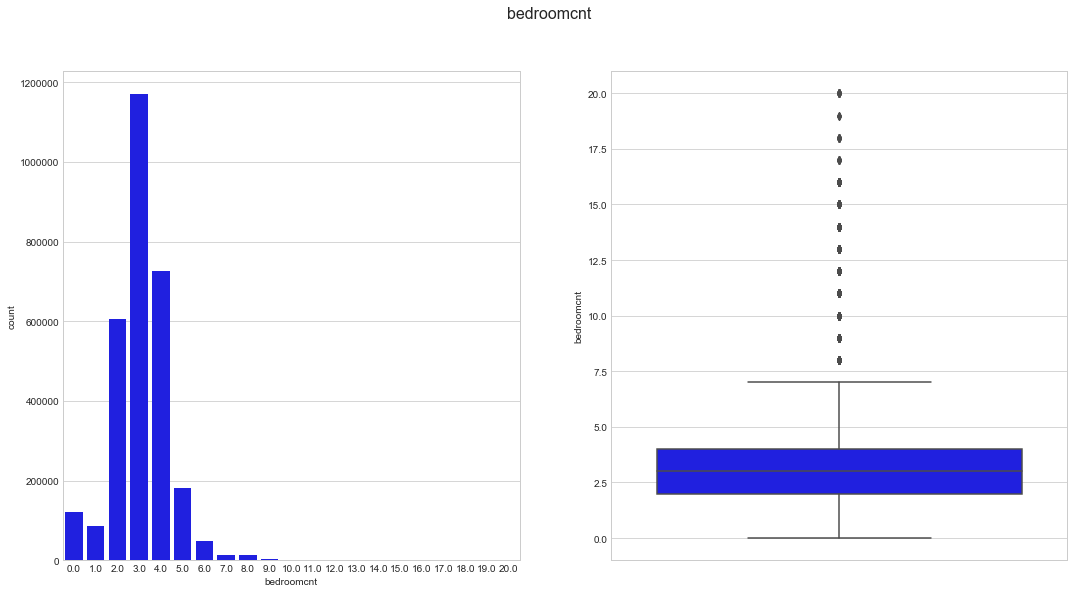

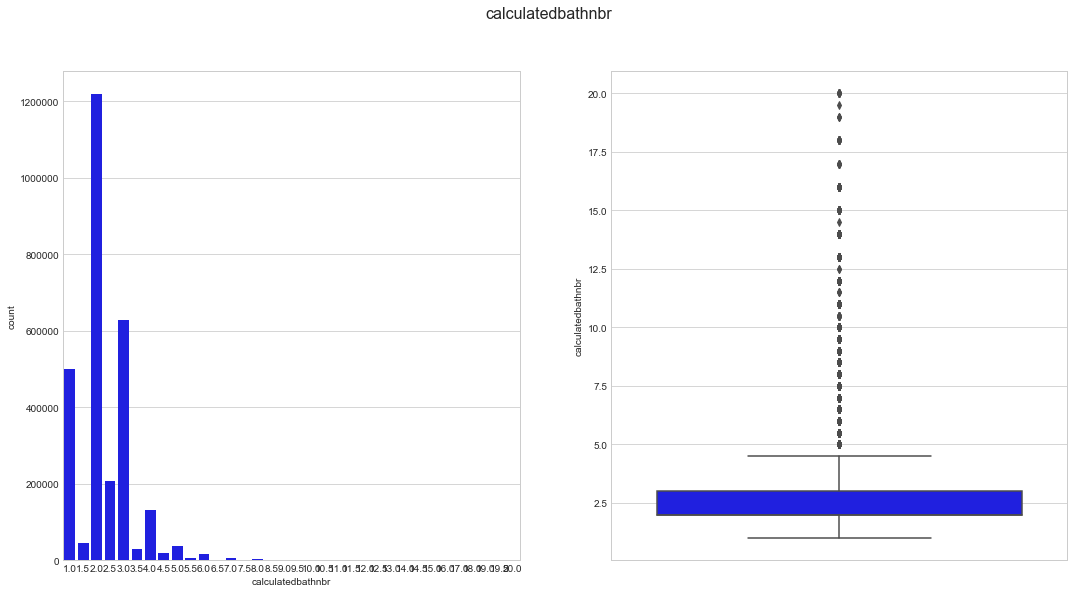

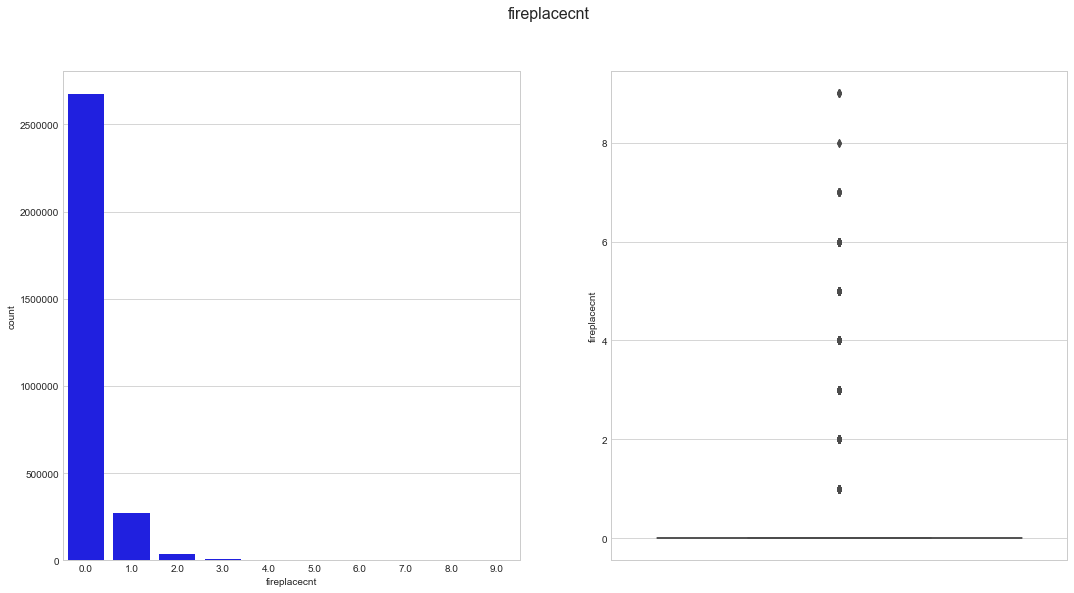

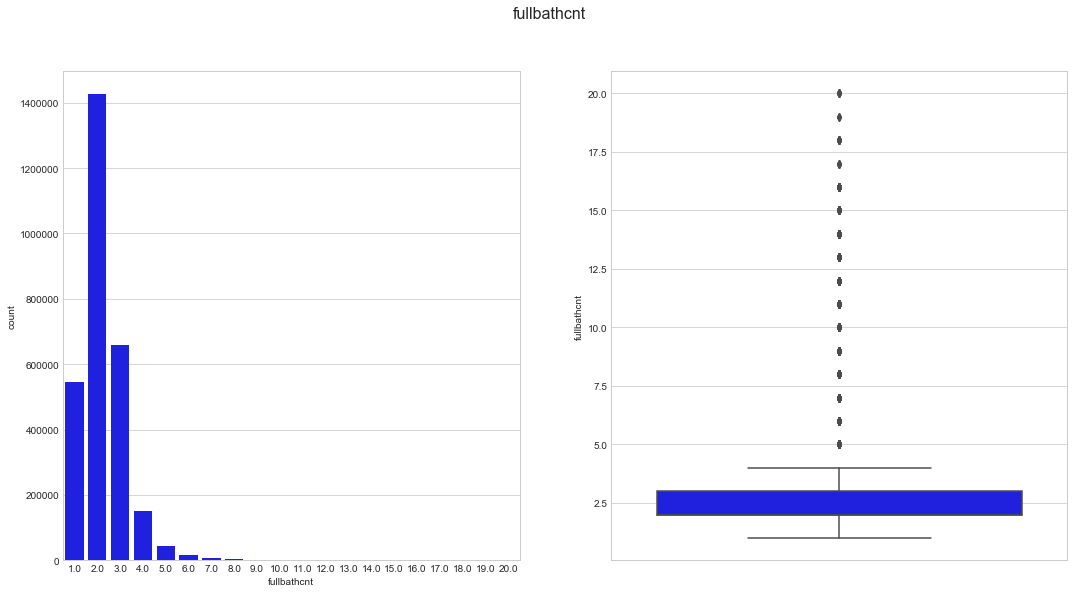

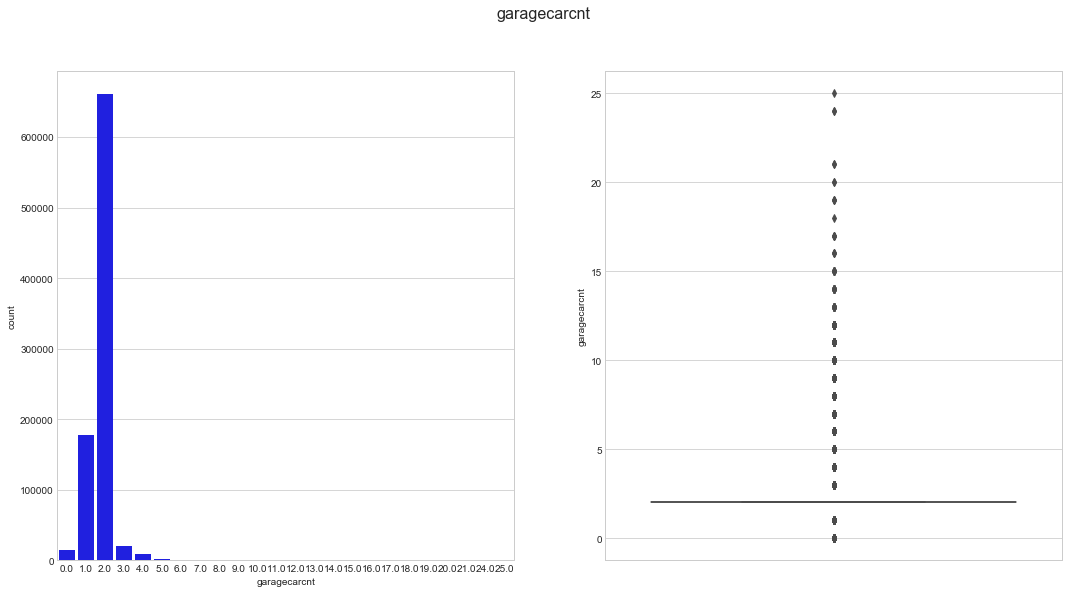

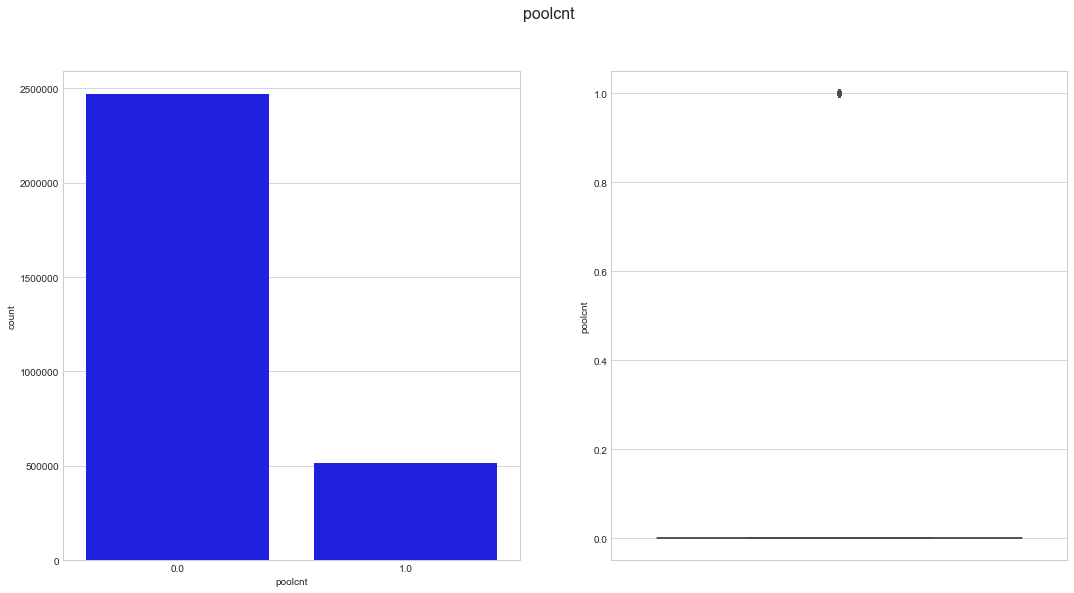

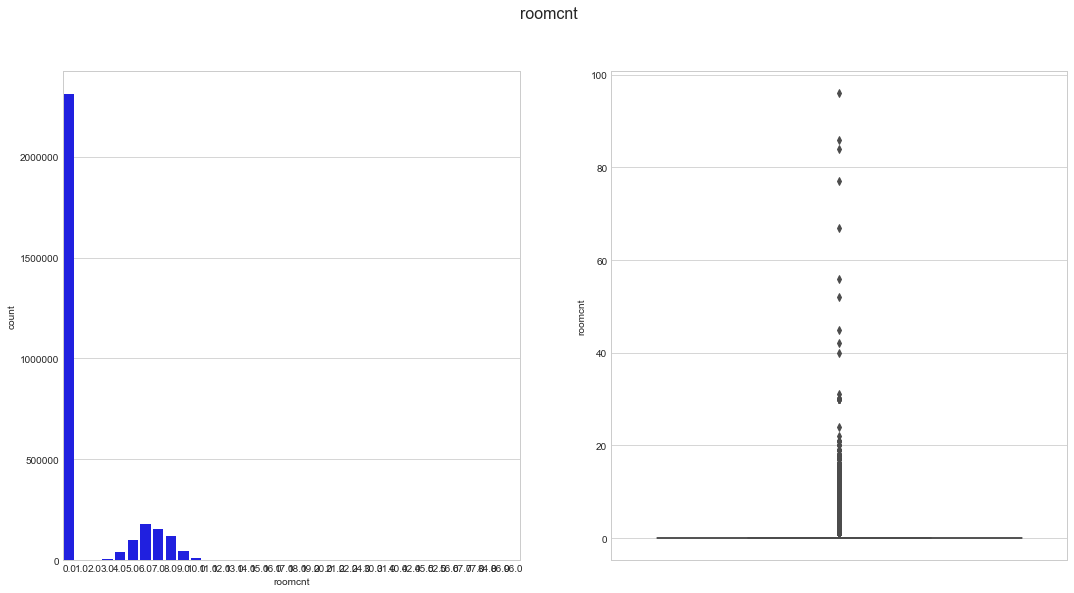

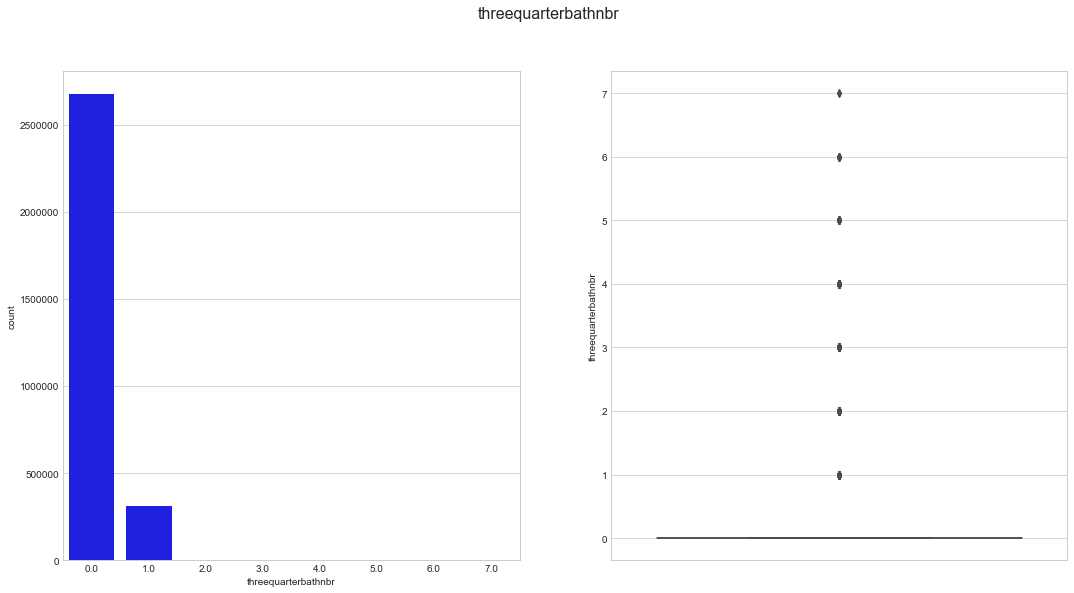

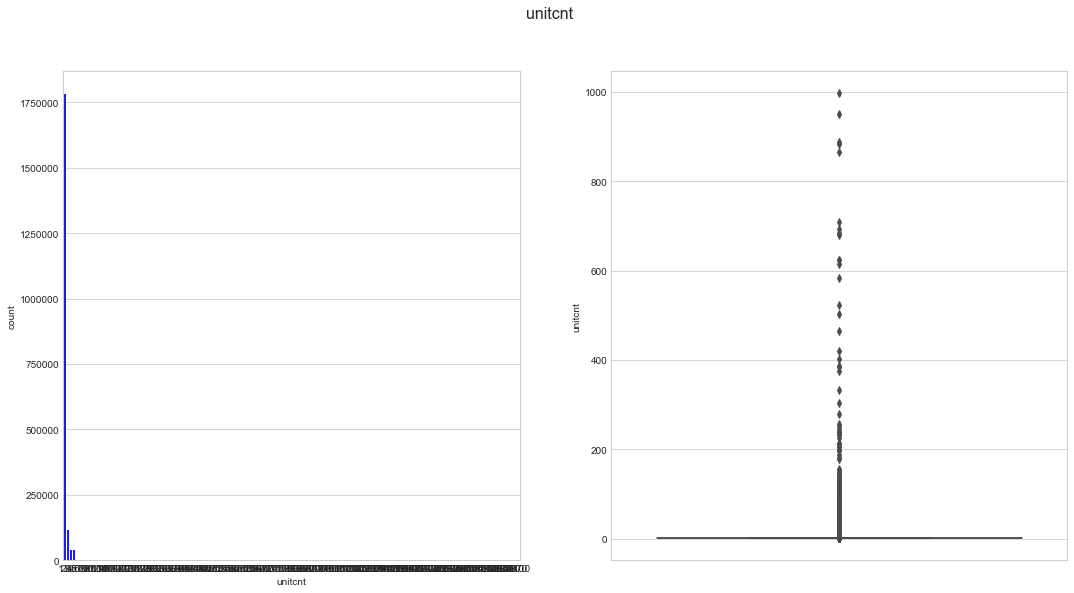

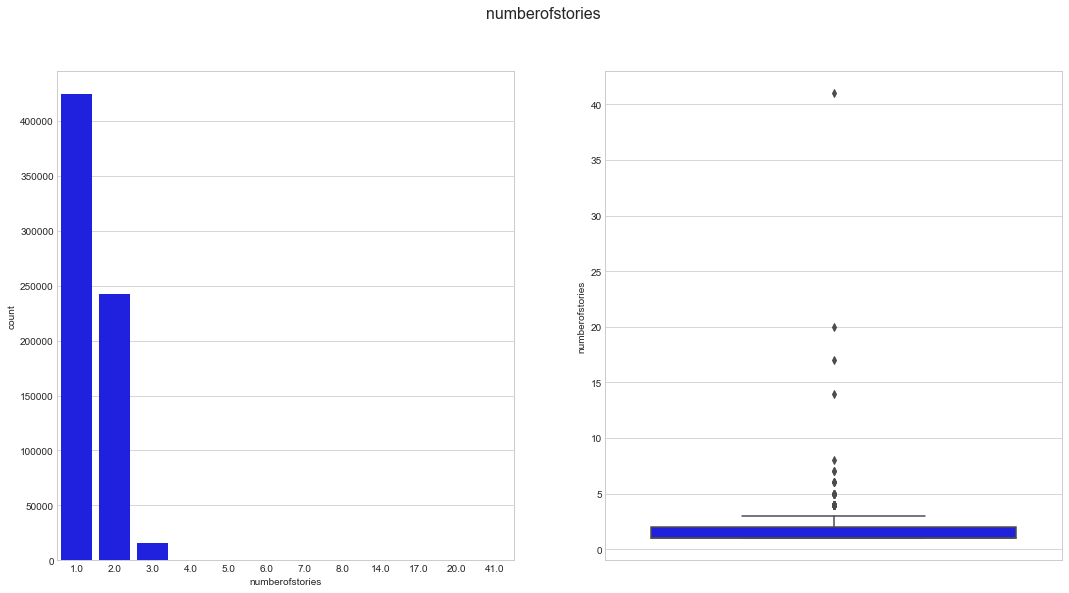

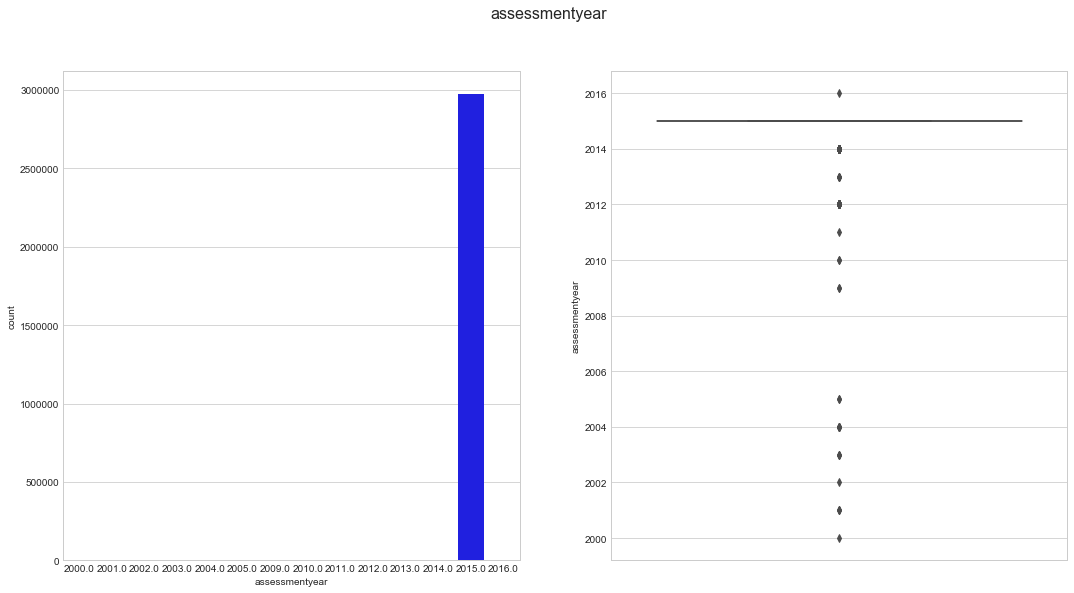

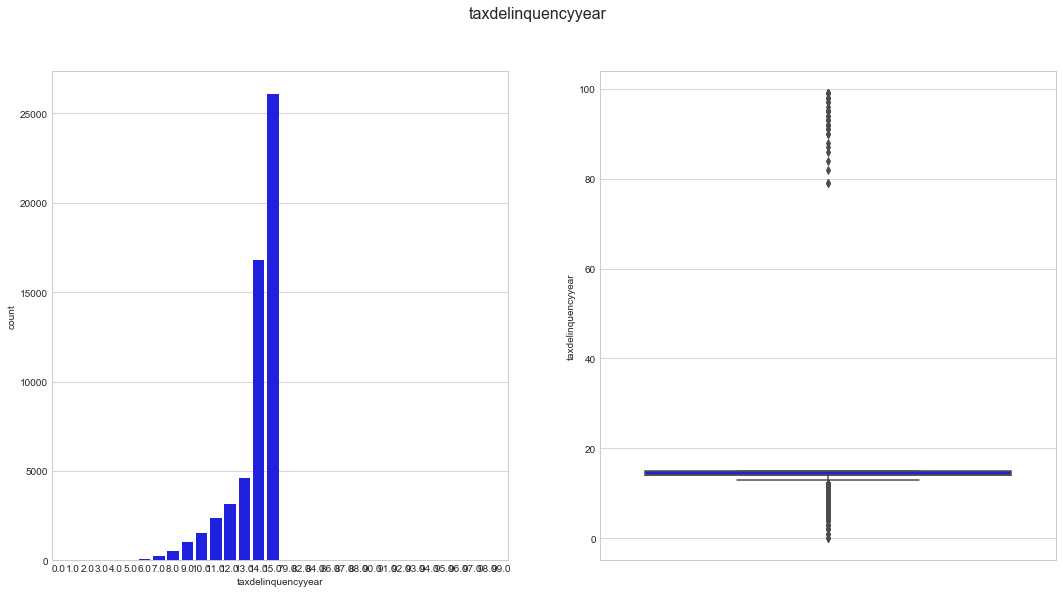

In [7]:
### Discrete variable plots
NanAsZero = ['fireplacecnt', 'poolcnt', 'threequarterbathnbr']
for col in discrete:
    if col in NanAsZero:
        data[col].fillna(0, inplace=True)
    values = data[col].dropna()   
    fig = plt.figure(figsize=(18,9));
    sns.countplot(x=values, color='Blue', ax = plt.subplot(121));
    sns.boxplot(y=values, color='Blue', ax = plt.subplot(122));
    plt.suptitle(col, fontsize=16)

In [8]:
### Reading train file
errors = pd.read_csv('./input/train_2016_v2.csv', parse_dates=['transactiondate'])
errors.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [9]:
#### Merging tables
data_sold = data.merge(errors, how='inner', on='parcelid')
data_sold.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,17073783,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,...,115087.0,191811.0,2015.0,76724.0,2015.06,NaN,NaN,61110022003007,0.0953,2016-01-27
1,17088994,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,...,143809.0,239679.0,2015.0,95870.0,2581.30,NaN,NaN,61110015031002,0.0198,2016-03-30
2,17100444,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,33619.0,47853.0,2015.0,14234.0,591.64,NaN,NaN,61110007011007,0.0060,2016-05-27
3,17102429,NaN,NaN,NaN,1.5,2.0,NaN,NaN,1.5,NaN,...,45609.0,62914.0,2015.0,17305.0,682.78,NaN,NaN,61110008002013,-0.0566,2016-06-07
4,17109604,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,...,277000.0,554000.0,2015.0,277000.0,5886.92,NaN,NaN,61110014021007,0.0573,2016-08-08


In [10]:
### Creating 5 equal size logerror bins 
data_sold['logerror_bin'] = pd.qcut(data_sold['logerror'], 5, 
                                    labels=['Large Negative Error', 'Medium Negative Error',
                                            'Small Error', 'Medium Positive Error',
                                            'Large Positive Error'])
print(data_sold.logerror_bin.value_counts())

Large Negative Error     18442
Small Error              18432
Medium Negative Error    17973
Large Positive Error     17947
Medium Positive Error    17481
Name: logerror_bin, dtype: int64


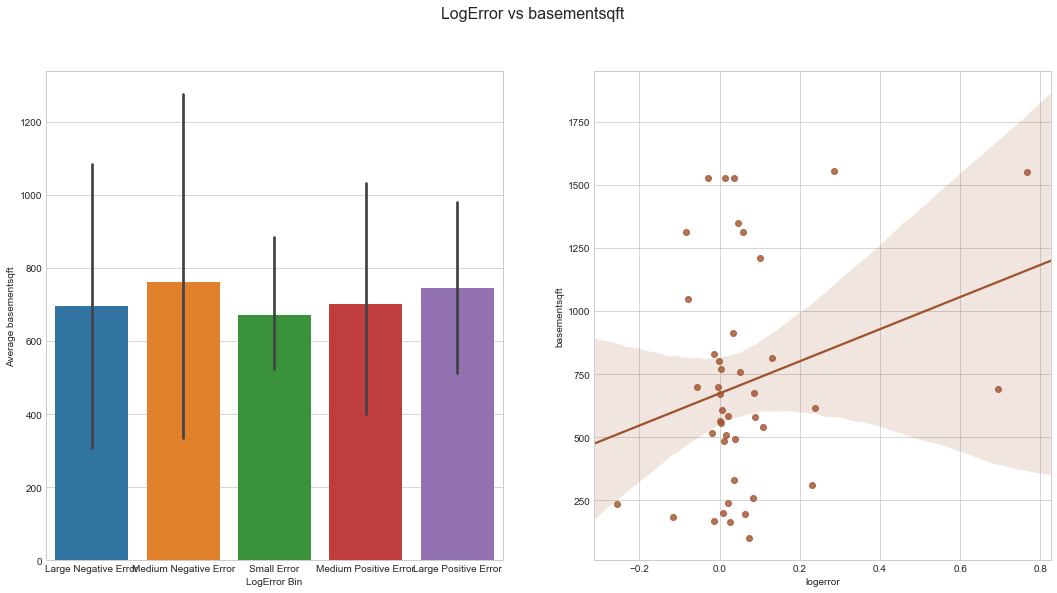

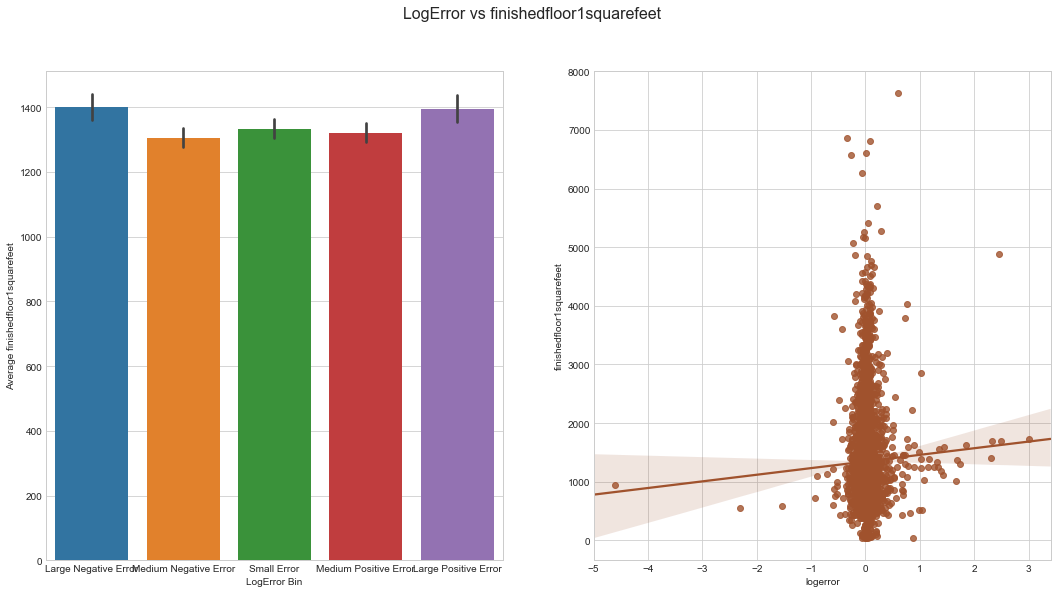

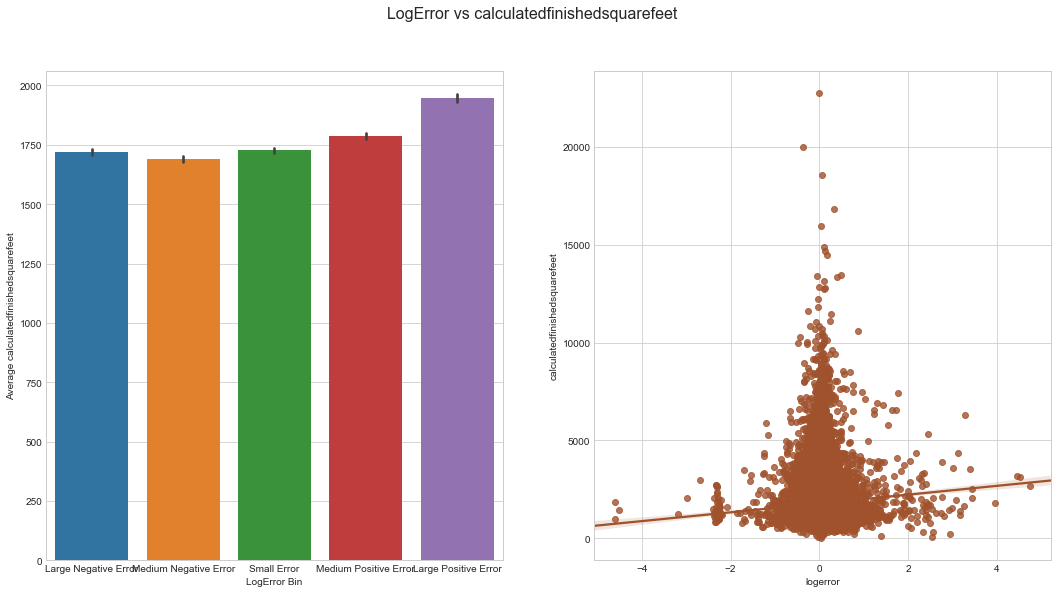

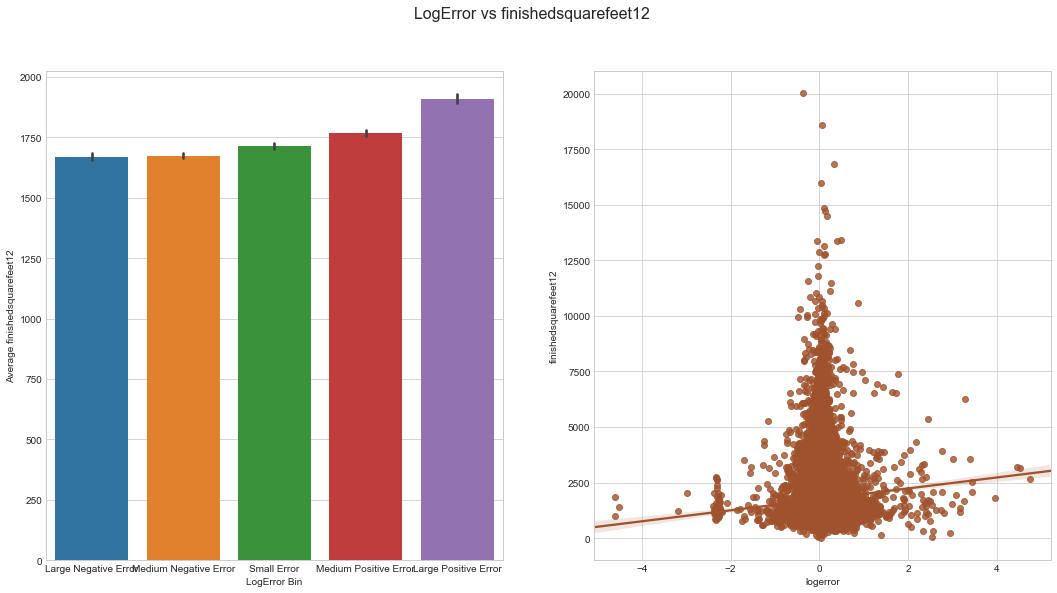

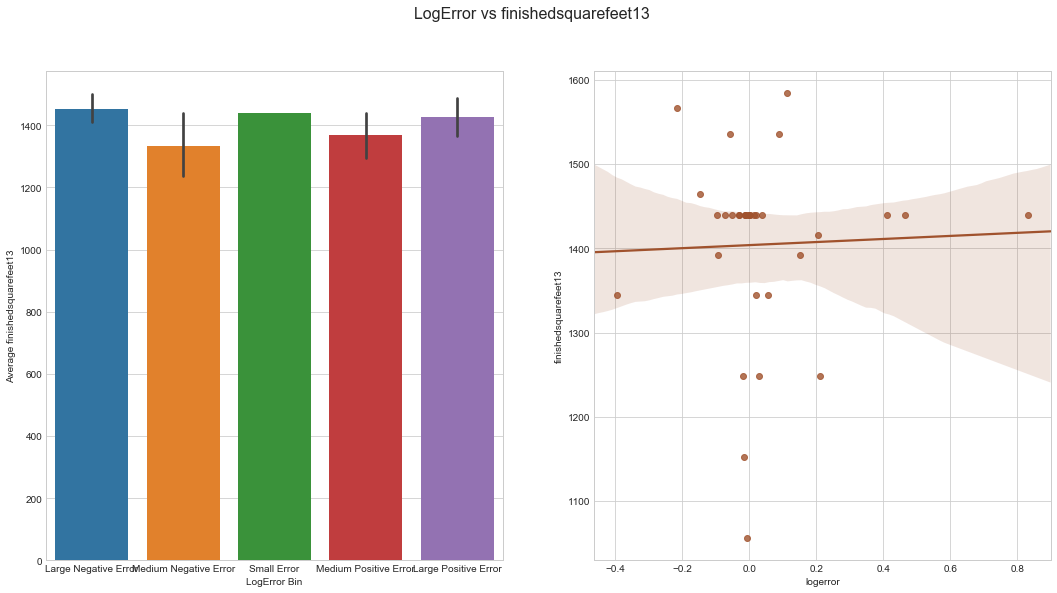

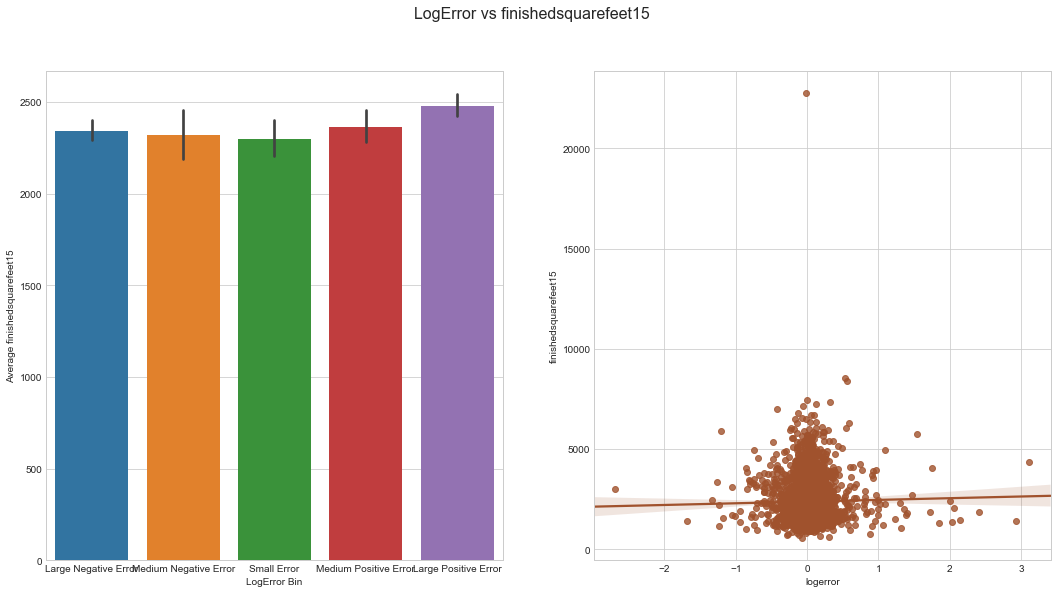

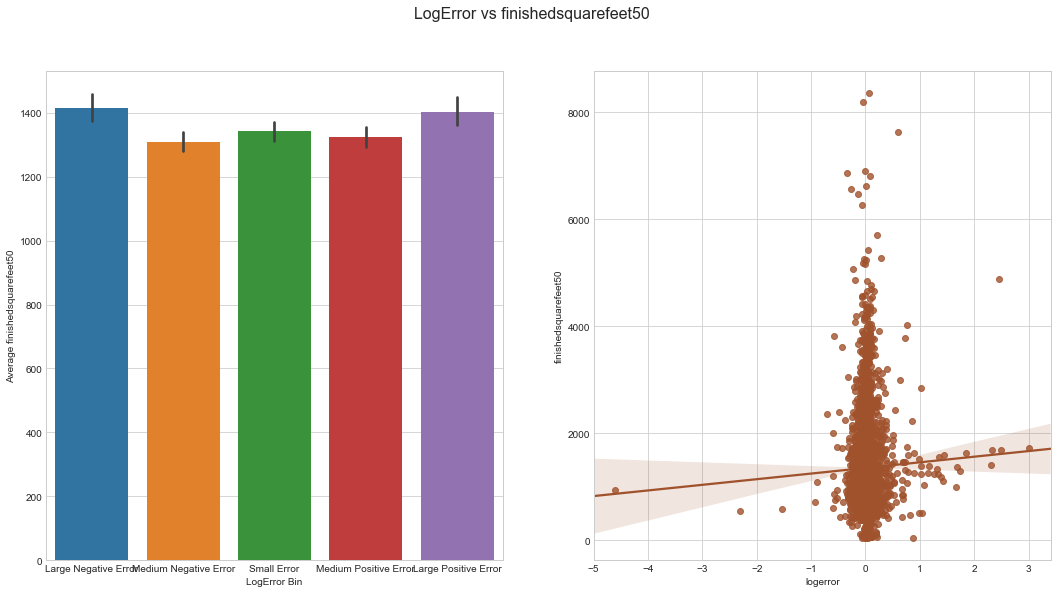

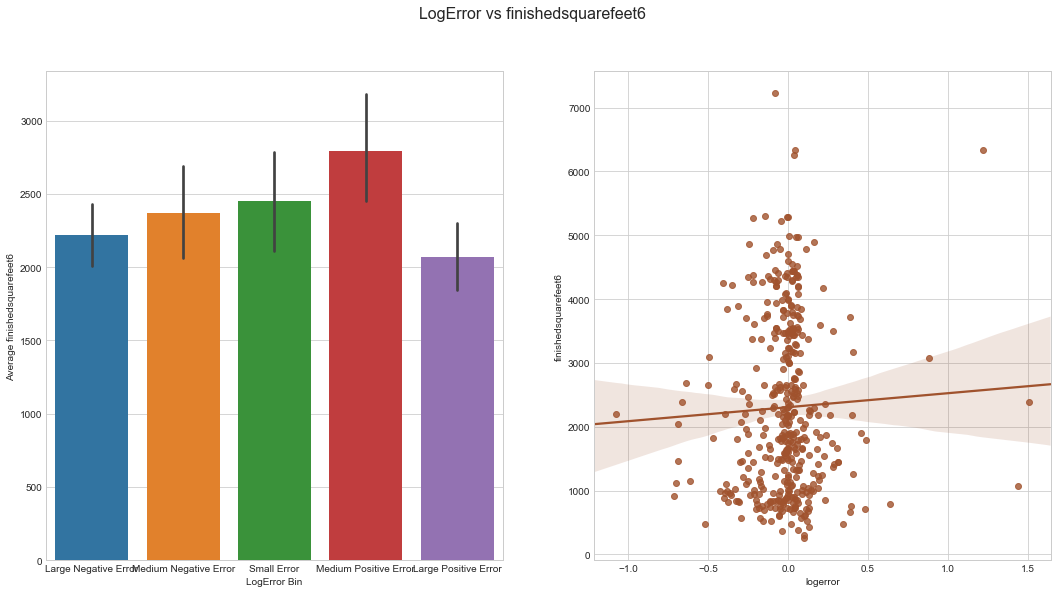

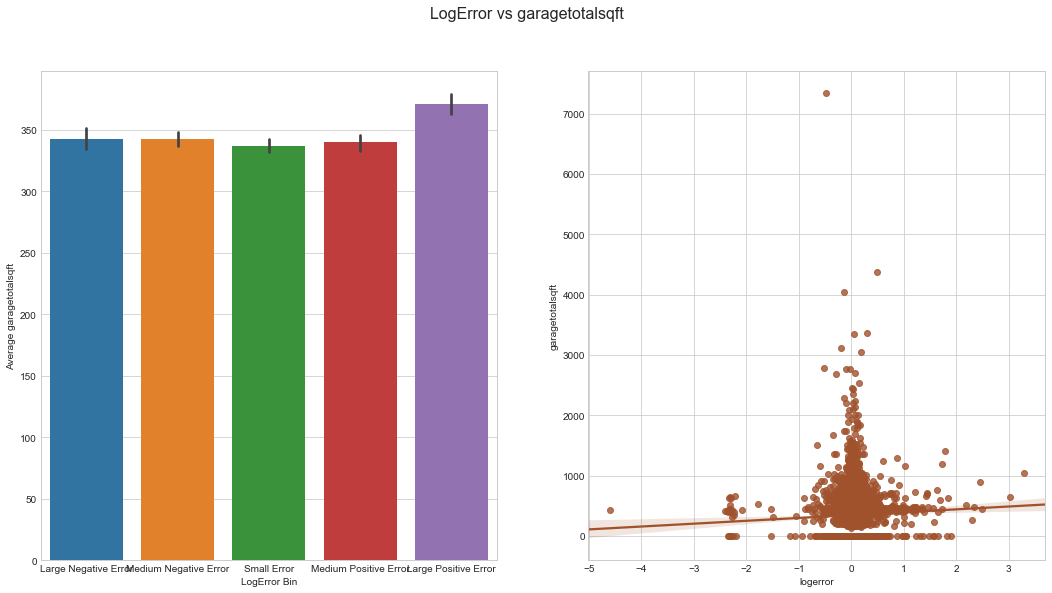

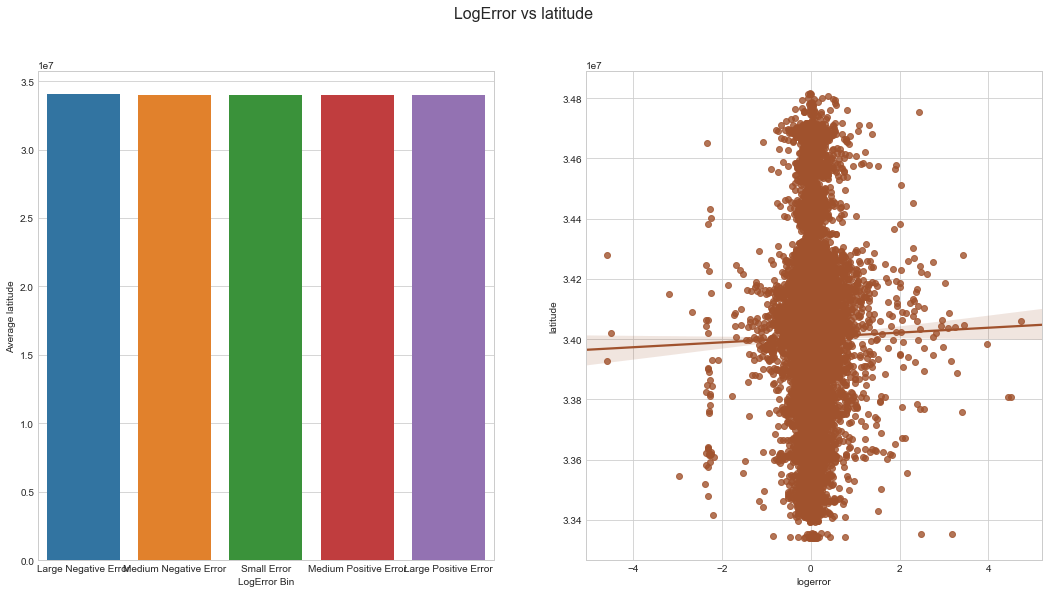

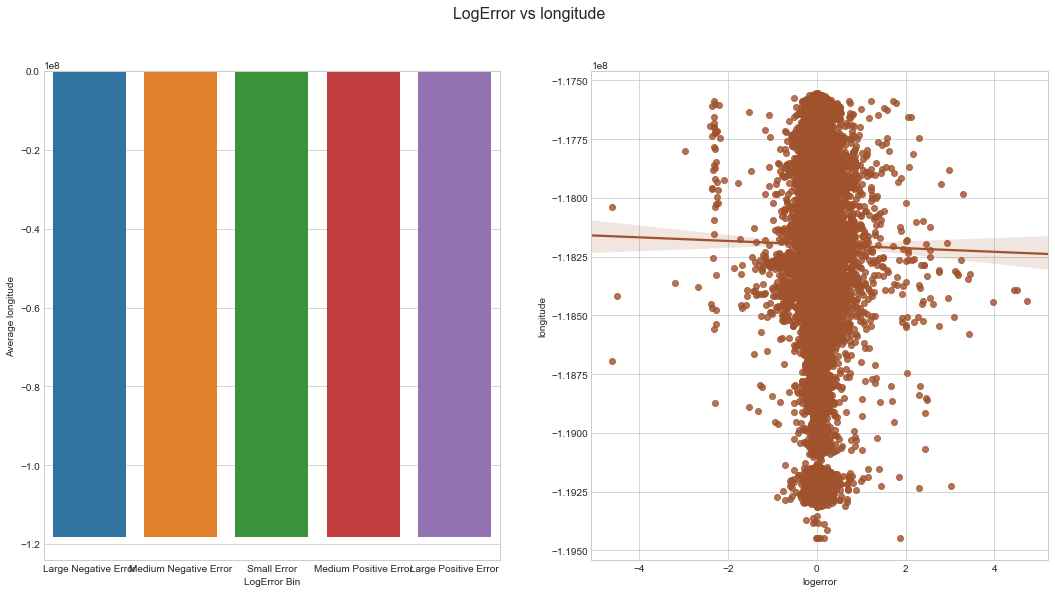

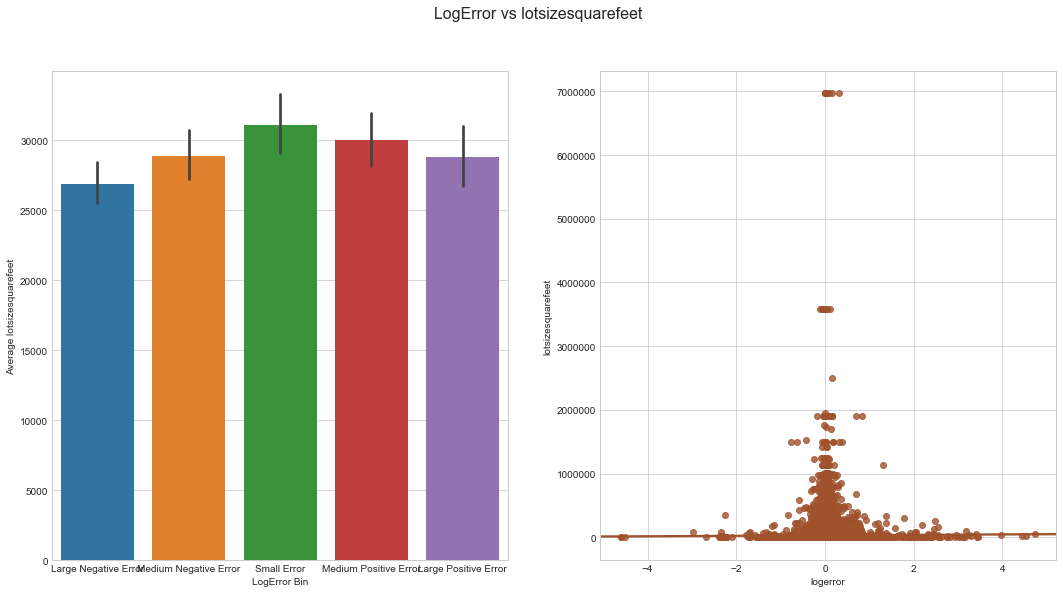

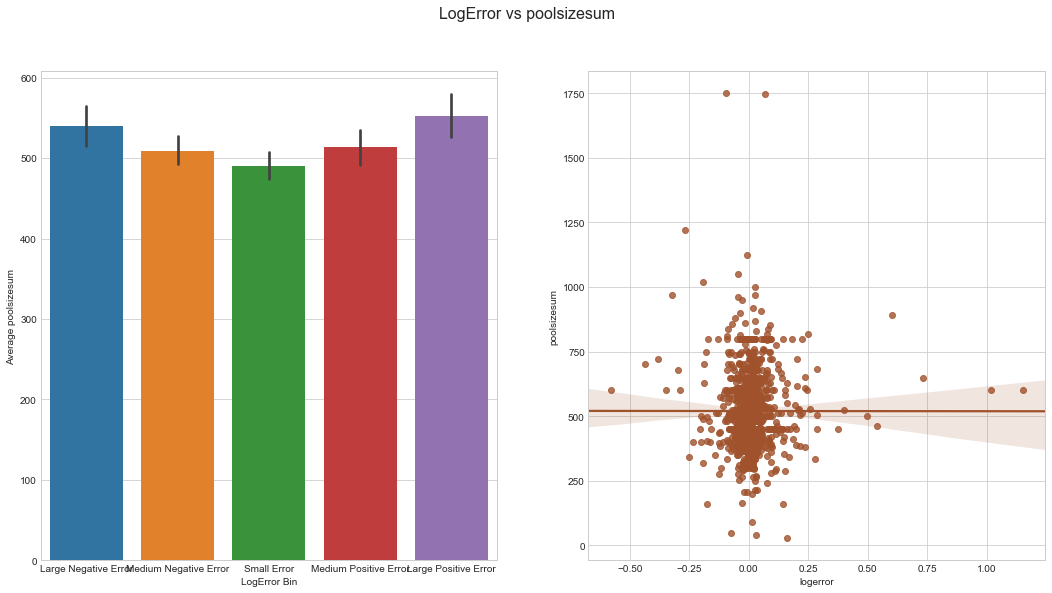

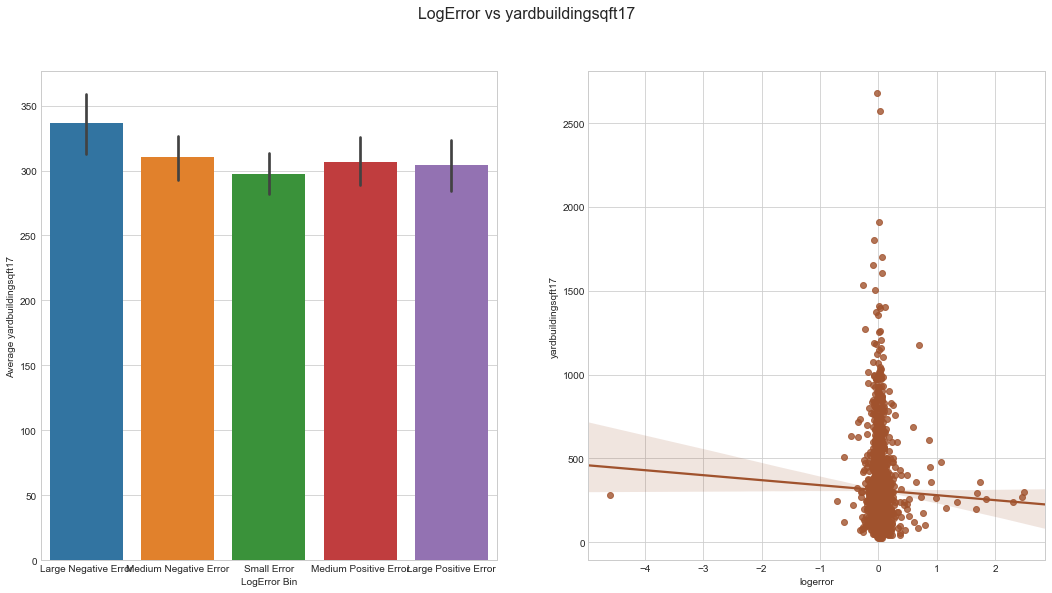

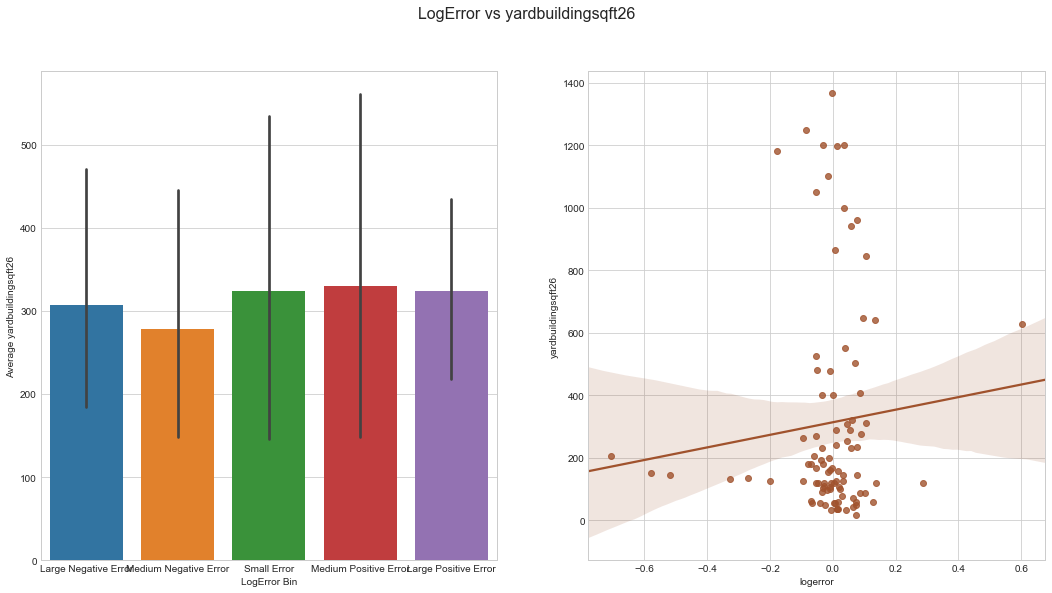

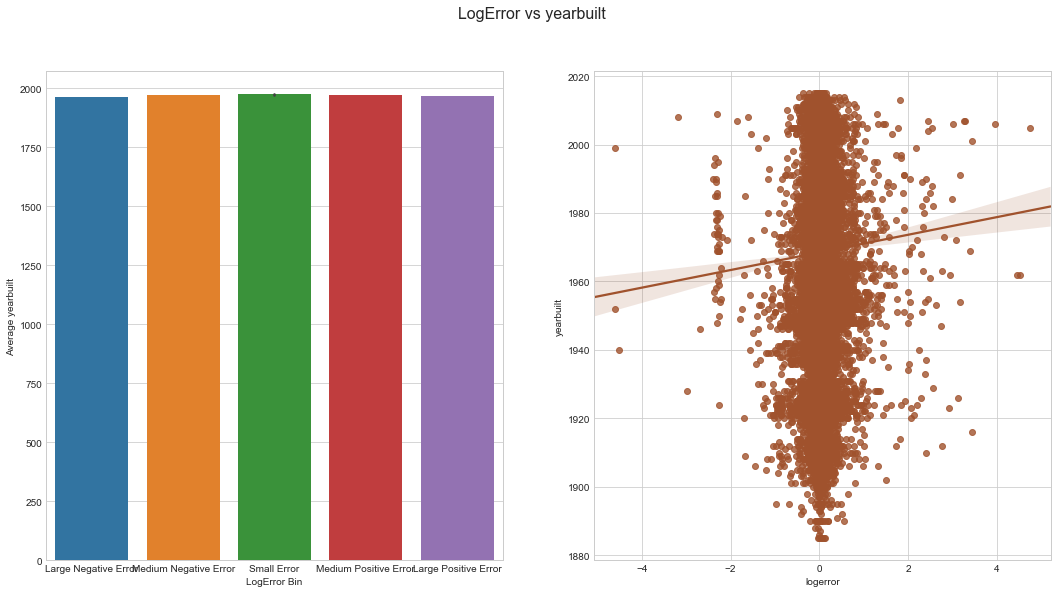

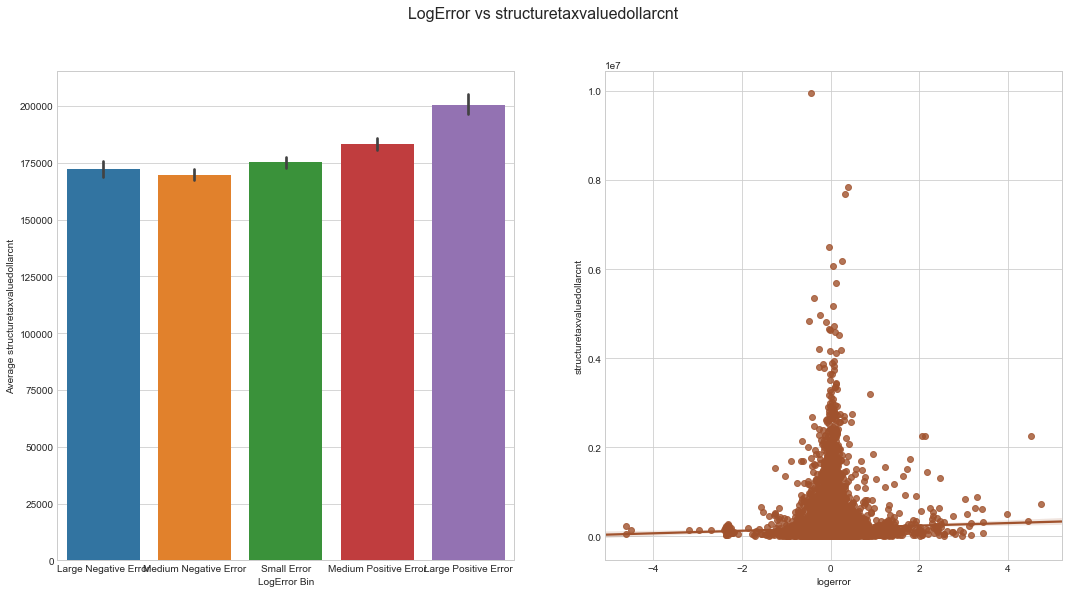

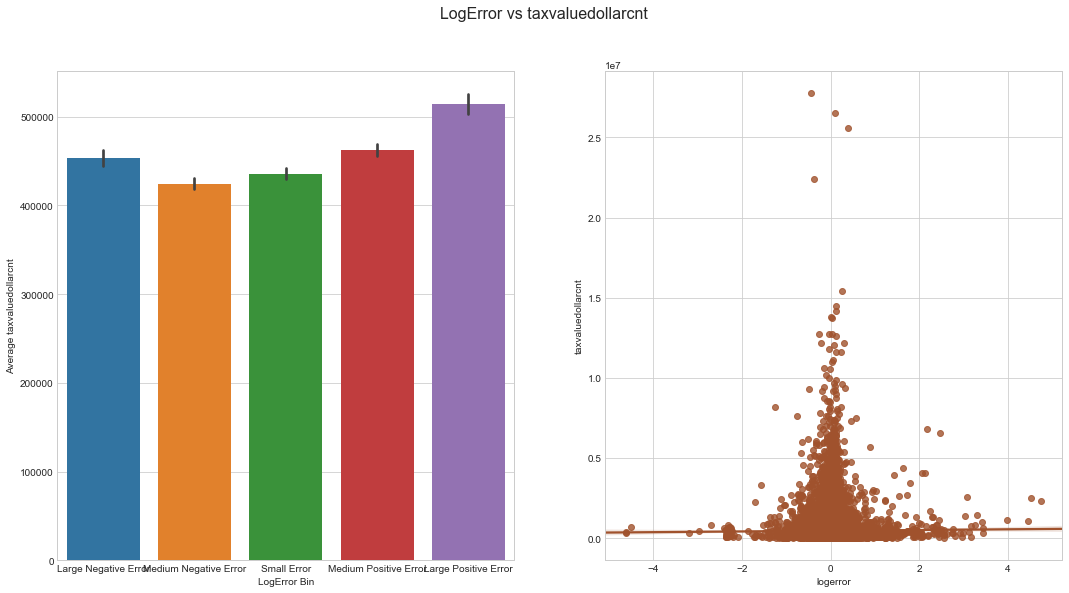

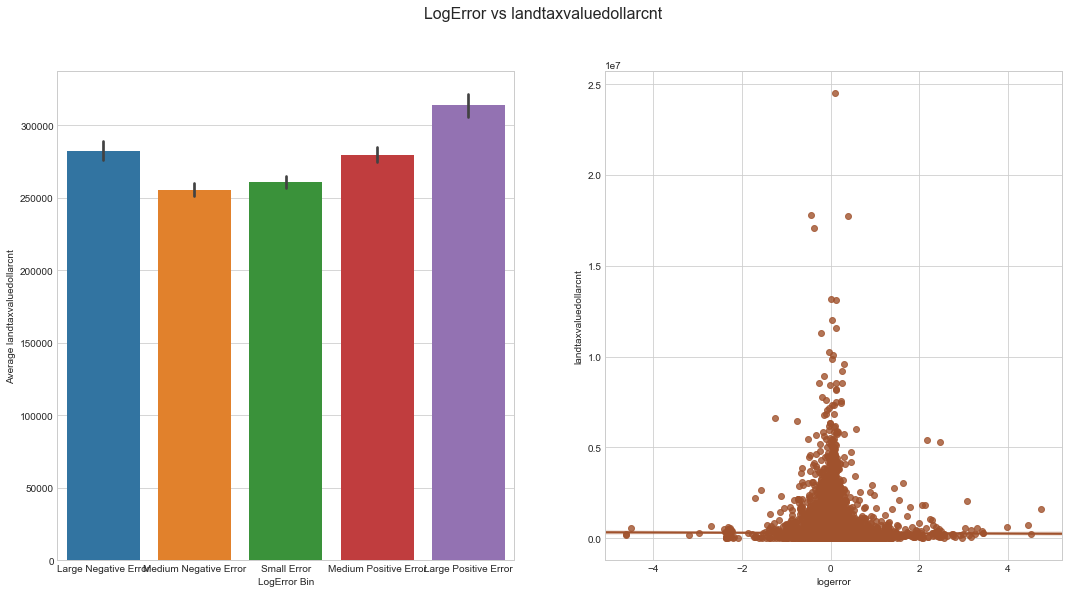

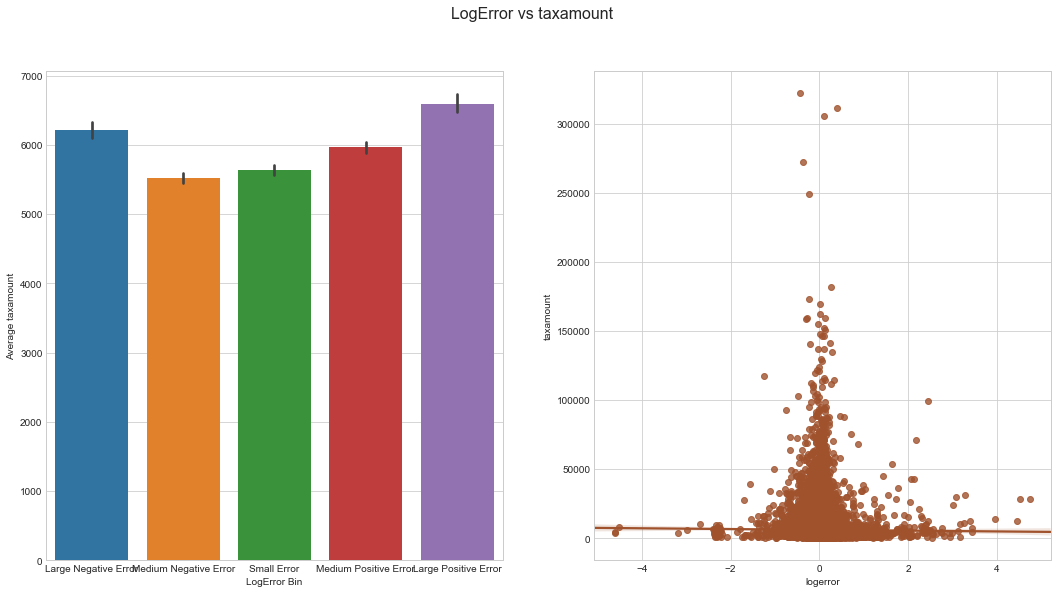

In [11]:
### Continuous variable vs logerror plots
for col in continuous:     
    fig = plt.figure(figsize=(18,9));
    sns.barplot(x='logerror_bin', y=col, data=data_sold, ax = plt.subplot(121),
                order=['Large Negative Error', 'Medium Negative Error','Small Error',
                       'Medium Positive Error', 'Large Positive Error']);
    plt.xlabel('LogError Bin');
    plt.ylabel('Average {}'.format(col));
    sns.regplot(x='logerror', y=col, data=data_sold, color='Sienna', ax = plt.subplot(122));
    plt.suptitle('LogError vs {}'.format(col), fontsize=16)   

### Prediction

In Progress

## Supplemental figures

In Progress

In [12]:
train_df = pd.read_csv("./input/train_2016_v2.csv", parse_dates=["transactiondate"])
train_df.shape

(90275, 3)

In [13]:
train_y = train_df['logerror'].values
cat_cols = ["hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag"]

from sklearn import ensemble

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(range(train.shape[0]), np.sort(train.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

NameError: name 'train' is not defined

Distribution of Target Variable:

In [ ]:
ulimit = np.percentile(train_df.logerror.values, 99)
llimit = np.percentile(train_df.logerror.values, 1)
train_df['logerror'].ix[train_df['logerror']>ulimit] = ulimit
train_df['logerror'].ix[train_df['logerror']<llimit] = llimit

plt.figure(figsize=(12,8))
sns.distplot(train_df.logerror.values, bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

In [ ]:
log_errors = train['logerror']
upper_lim = np.percentile(log_errors, 99.5)
lower_lim = np.percentile(log_errors, 0.5)
log_errors = log_errors.clip(lower=lower_lim, upper=upper_lim)

In [ ]:
plt.figure(figsize=(12,10))
plt.hist(log_errors, bins=300)
plt.title('Distribution of Target Variable (log-error)')
plt.ylabel('count')
plt.xlabel('log-error')
plt.show()

Log-errors are close to normally distributed around a 0 mean, but with a slightly positive skew. There are also a considerable number of outliers, I will explore whether removing these improves model performance.

Proportion of Missing Values in Each Column:

In [ ]:
#load property features/description file
prop = pd.read_csv("../input/properties_2016.csv")
print(prop.head())
print('---------------------')
print(prop.shape)

In [ ]:
(train_df['parcelid'].value_counts().reset_index())['parcelid'].value_counts()

In [ ]:
prop_df = pd.read_csv("./input/properties_2016.csv")
prop_df.shape

In [ ]:
prop_df.head()

In [ ]:
train_df = pd.read_csv("./input/train_2016_v2.csv", parse_dates=["transactiondate"])
train_df.shape

In [ ]:
train_y = train_df['logerror'].values
cat_cols = ["hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag"]

from sklearn import ensemble

In [ ]:
missing_df = prop_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [ ]:
plt.figure(figsize=(12,12))
sns.jointplot(x=prop_df.latitude.values, y=prop_df.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

In [ ]:
train_df = pd.merge(train_df, prop_df, on='parcelid', how='left')
train_df.head()

In [ ]:
pd.options.display.max_rows = 65

dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_dfdtype_df.groupby("Column Type").aggregate('count').reset_index()

In [ ]:
dtype_df.groupby("Column Type").aggregate('count').reset_index()

In [ ]:
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / train_df.shape[0]
missing_df.ix[missing_df['missing_ratio']>0.999]

In [ ]:
# Let us just impute the missing values with mean values to compute correlation coefficients #
mean_values = train_df.mean(axis=0)
train_df_new = train_df.fillna(mean_values, inplace=True)

# Now let us look at the correlation coefficient of each of these variables #
x_cols = [col for col in train_df_new.columns if col not in ['logerror'] if train_df_new[col].dtype=='float64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train_df_new[col].values, train_df_new.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
#autolabel(rects)
plt.show()

In [ ]:
corr_zero_cols = ['assessmentyear', 'storytypeid', 'pooltypeid2', 'pooltypeid7', 'pooltypeid10', 'poolcnt', 'decktypeid', 'buildingclasstypeid']
for col in corr_zero_cols:
    print(col, len(train_df_new[col].unique()))

In [ ]:
corr_df_sel = corr_df.ix[(corr_df['corr_values']>0.02) | (corr_df['corr_values'] < -0.01)]
corr_df_sel

In [ ]:
cols_to_use = corr_df_sel.col_labels.tolist()

temp_df = train_df[cols_to_use]
corrmat = temp_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

In [ ]:
col = "finishedsquarefeet12"
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
train_df[col].ix[train_df[col]>ulimit] = ulimit
train_df[col].ix[train_df[col]<llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=train_df.finishedsquarefeet12.values, y=train_df.logerror.values, size=10)
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Finished Square Feet 12', fontsize=12)
plt.title("Finished square feet 12 Vs Log error", fontsize=15)
plt.show()

In [ ]:
col = "calculatedfinishedsquarefeet"
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
train_df[col].ix[train_df[col]>ulimit] = ulimit
train_df[col].ix[train_df[col]<llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=train_df.calculatedfinishedsquarefeet.values, y=train_df.logerror.values, size=10)
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Calculated finished square feet', fontsize=12)
plt.title("Calculated finished square feet Vs Log error", fontsize=15)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="bathroomcnt", data=train_df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Bathroom', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Bathroom count", fontsize=15)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="bedroomcnt", data=train_df)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Bedroom Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Bedroom count", fontsize=15)
plt.show()

In [ ]:
train_df['bedroomcnt'].ix[train_df['bedroomcnt']>7] = 7
plt.figure(figsize=(12,8))
sns.violinplot(x='bedroomcnt', y='logerror', data=train_df)
plt.xlabel('Bedroom count', fontsize=12)
plt.ylabel('Log Error', fontsize=12)
plt.show()

In [ ]:
from ggplot import *
ggplot(aes(x='yearbuilt', y='logerror'), data=train_df) + \
    geom_point(color='steelblue', size=1) + \
    stat_smooth()

In [ ]:
ggplot(aes(x='latitude', y='longitude', color='logerror'), data=train_df) + \
    geom_point() + \
    scale_color_gradient(low = 'red', high = 'blue')

In [ ]:
ggplot(aes(x='finishedsquarefeet12', y='taxamount', color='logerror'), data=train_df) + \
    geom_point(alpha=0.7) + \
    scale_color_gradient(low = 'pink', high = 'blue')

In [ ]:
ggplot(aes(x='finishedsquarefeet12', y='taxamount', color='logerror'), data=train_df) + \
    geom_now_its_art()

In [ ]:
train_y = train_df['logerror'].values
cat_cols = ["hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag"]
train_df = train_df.drop(['parcelid', 'logerror', 'transactiondate']+cat_cols, axis=1)
feat_names = train_df.columns.values

from sklearn import ensemble
model = ensemble.ExtraTreesRegressor(n_estimators=25, max_depth=30, max_features=0.3, n_jobs=-1, random_state=0)
model.fit(train_df, train_y)

## plot the importances ##
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [ ]:
import xgboost as xgb
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed' : 0
}
dtrain = xgb.DMatrix(train_df, train_y, feature_names=train_df.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=50)

In [ ]:
# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, height=0.8, ax=ax)
plt.show()

In [ ]:
     print("Training Size:" + str(train.shape))
     print("Property Size:" + str(prop.shape))

In [ ]:
### ... check for NaNs
nan = prop.isnull().sum()
nan

In [ ]:
### Plotting NaN counts
nan_sorted = nan.sort_values(ascending=False).to_frame().reset_index()
nan_sorted.columns = ['Column', 'Number of NaNs']

In [ ]:
import seaborn as sns

In [ ]:
fig, ax = plt.subplots(figsize=(12, 25))
sns.barplot(x="Number of NaNs", y="Column", data=nan_sorted, color='Blue', ax=ax)
ax.set(xlabel="Number of NaNs", ylabel="", title="Total Number of NaNs in each column")
plt.show()

There are several columns which have a very high proportion of missing values. It may be worth analysing these more closely.

In [ ]:
train['transaction_month'] = pd.DatetimeIndex(train['transactiondate']).month
train.sort_values('transaction_month', axis=0, ascending=True, inplace=True)
print(train.head())

ax = sns.stripplot(x=train['transaction_month'], y=train['logerror'])

For submission we are required to predict values for October, November and December. The differing distributions of the target variable over these months indicates that it may be useful to create an additional 'transaction_month' feature as shown above. Lets have a closer look at the distribution across only October, November and December.

In [ ]:
ax1 = sns.stripplot(x=train['transaction_month'][train['transaction_month'] > 9], y=train['logerror'])

Proportion of Transactions in Each Month

In [ ]:
trans = train['transaction_month'].value_counts(normalize=True)
trans = pd.DataFrame(trans)
trans['month'] = trans.index
trans = trans.sort_values('month', ascending=True)
trans.set_index('month')
trans.rename({'transaction_month' : ''})
print(trans)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(12, 5))
plt.bar(range(len(months)), trans['transaction_month'])
plt.title('Proportion of Transactions per Month')
plt.ylabel('Proportion')
plt.xlabel('Month')
plt.xticks(range(len(months)), months, rotation=90)
plt.show()

Feature Importance

In [ ]:
#fill NaN values with -1 and encode object columns 
for x in prop.columns:
    prop[x] = prop[x].fillna(-1)

#many more parcelids in properties file, merge with training file
train = pd.merge(train, prop, on='parcelid', how='left')
print(train.head())
print('---------------------')
print(train.shape)

In [ ]:
for c in train[['transactiondate', 'hashottuborspa', 'propertycountylandusecode', 'propertyzoningdesc', 'fireplaceflag', 'taxdelinquencyflag']]:
    label = LabelEncoder()
    label.fit(list(train[c].values))
    train[c] = label.transform(list(train[c].values))

x_train = train.drop(['parcelid', 'logerror', 'transactiondate'], axis=1)
y_train = train['logerror']

In [ ]:
print(x_train.head())
print('------------')
print(y_train.head())

In [ ]:
rf = RandomForestRegressor(n_estimators=30, max_features=None)

rf.fit(x_train, y_train)

rf_importance = rf.feature_importances_


importance = pd.DataFrame()
importance['features'] = x_train.columns
importance['importance'] = rf_importance
print(importance.head())

In [ ]:
importance.sort_values('importance', axis=0, inplace=True, ascending=False)

print('------------')
print(importance.head())

In [ ]:
fig = plt.figure(figsize=(10, 4), dpi=100)
plt.bar(range(len(importance)), importance['importance'])
plt.title('Feature Importances')
plt.xlabel('Feature Name')
plt.ylabel('Importance')
plt.xticks(range(len(importance)), importance['features'], rotation=90)
plt.show()

Here we see that the greatest importance in predicting the log-error comes from features involving taxes and geographical location of the property. Notably, the 'transaction_month' feature that was engineered earlier was the 12th most important feature. 

In [ ]:
test= test.rename(columns={'ParcelId': 'parcelid'}) 
#To make it easier for merging datasets on same column_id later

## Conclusions

In Progress

## Bibliography

Couzin-Frankel, J. 2010. “Cancer Research. As Questions Grow, Duke Halts Trials, Launches Investigation.” Science 329 (5992): 614–15. 

Hunter, J. D. 2007. “Matplotlib: A 2D Graphics Environment.” Computing In Science & Engineering 9 (3): 90–95.

McKinney, W. 2010. “Data Structures for Statistical Computing in Python.” In Proceedings of the 9th Python in Science Conference, edited by S. J. van der Walt and K. J. Millman. Austin, Texas.

Pedregosa, Fabian, Gaël Varoquaux, Alexandre Gramfort, Vincent Michel, Bertrand Thirion, Olivier Grisel, Mathieu Blondel, et al. 2011. “Scikit-Learn: Machine Learning in Python.” Journal of Machine Learning Research 12 (Oct): 2825–30.

Pérez, F., and B. E. Granger. 2007. “IPython: A System for Interactive Scientific Computing.” Computing in Science & Engineering 9 (3): 21–29.

Pérez, F., B. E. Granger, and J. D. Hunter. 2011. “Python: An Ecosystem for Scientific Computing.” Computing in Science & Engineering 13 (2): 13–21.

Van der Walt, S., S. C. Colbert, and G. Varoquaux. 2011. “The NumPy Array: A Structure for Efficient Numerical Computation.” Computing in Science & Engineering 13 (2): 22–30.

Waskom, M, O Botvinnik, P Hobson, J Warmenhoven, JB Cole, Y Halchenko, J Vanderplas, et al. 2014. Seaborn: Statistical Data Visualization. Stanford, California.

<div class="cite2c-biblio"></div>